In [59]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os

In [60]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,f1_score
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier

from sklearn import metrics
from sklearn.metrics import accuracy_score, classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

import warnings
warnings.filterwarnings("ignore")

In [61]:
import pandas as pd
import numpy as np

df = pd.read_csv('C:/Users/91858/Desktop/research dev/Mohita/Edge-IIoTset dataset/Selected dataset for ML and DL/DNN-EdgeIIoT-dataset.csv', low_memory=False) 
df1=pd.read_csv('C:/Users/91858/Desktop/research dev/Mohita/wustl-ehms-2020.csv')

In [62]:
df1.head()

Dir  Flgs     SrcAddr     DstAddr  Sport  Dport  SrcByt1s  DstByt1s  \
0     ->     1  10.0.1.172  10.0.1.150  58059   1111       496       186   
1     ->     1  10.0.1.172  10.0.1.150  58062   1111       496       186   
2     ->     1  10.0.1.172  10.0.1.150  58065   1111       496       186   
3     ->     1  10.0.1.172  10.0.1.150  58067   1111       496       186   
4     ->     1  10.0.1.172  10.0.1.150  58069   1111       496       186   

    SrcLoad  DstLoad  ...  Pack1t_nu4  T14p  SpO2  Puls1_Rat1  SYS  DIA  \
0  276914.0  92305.0  ...           1  28.9     0           0    0    0   
1  230984.0  76995.0  ...           2  28.9     0           0    0    0   
2  218470.0  72823.0  ...           3  28.9    89         104    0    0   
3  203376.0  67792.0  ...           4  28.9    89         104    0    0   
4  235723.0  78574.0  ...           5  28.9    89         101    0    0   

   H1art_rat1  R1sp_Rat1   ST  Lab1l  
0           0          0  0.0      0  
1          78         17  0.4      0  
2          78         17  0.4      0  
3          79         17  0.4      0  
4          79         17  0.4      0  

[5 rows x 44 columns]

In [63]:
df.head(5)

frame.time    ip.src_host    ip.dst_host arp.dst.proto_ipv4  \
0   2021 11:44:10.081753000   192.168.0.128  192.168.0.101                  0   
1   2021 11:44:10.162218000   192.168.0.101  192.168.0.128                  0   
2   2021 11:44:10.162271000   192.168.0.128  192.168.0.101                  0   
3   2021 11:44:10.162641000   192.168.0.128  192.168.0.101                  0   
4   2021 11:44:10.166132000   192.168.0.101  192.168.0.128                  0   

   arp.opcode  arp.hw.size arp.src.proto_ipv4  icmp.checksum  icmp.seq_le  \
0         0.0          0.0                  0            0.0          0.0   
1         0.0          0.0                  0            0.0          0.0   
2         0.0          0.0                  0            0.0          0.0   
3         0.0          0.0                  0            0.0          0.0   
4         0.0          0.0                  0            0.0          0.0   

   icmp.transmit_timestamp  ...  mqtt.proto_len mqtt.protoname  \
0                      0.0  ...             0.0              0   
1                      0.0  ...             4.0           MQTT   
2                      0.0  ...             0.0              0   
3                      0.0  ...             0.0              0   
4                      0.0  ...             0.0              0   

                 mqtt.topic mqtt.topic_len mqtt.ver mbtcp.len mbtcp.trans_id  \
0                         0            0.0      0.0       0.0            0.0   
1                         0            0.0      4.0       0.0            0.0   
2                         0            0.0      0.0       0.0            0.0   
3                         0            0.0      0.0       0.0            0.0   
4  Temperature_and_Humidity           24.0      0.0       0.0            0.0   

  mbtcp.unit_id  Attack_label  Attack_type  
0           0.0             0       Normal  
1           0.0             0       Normal  
2           0.0             0       Normal  
3           0.0             0       Normal  
4           0.0             0       Normal  

[5 rows x 63 columns]

In [65]:
df_exp=df.append(df1)

In [66]:
df_exp.head(10)

frame.time    ip.src_host    ip.dst_host arp.dst.proto_ipv4  \
0   2021 11:44:10.081753000   192.168.0.128  192.168.0.101                  0   
1   2021 11:44:10.162218000   192.168.0.101  192.168.0.128                  0   
2   2021 11:44:10.162271000   192.168.0.128  192.168.0.101                  0   
3   2021 11:44:10.162641000   192.168.0.128  192.168.0.101                  0   
4   2021 11:44:10.166132000   192.168.0.101  192.168.0.128                  0   
5   2021 11:44:10.166159000   192.168.0.128  192.168.0.101                  0   
6   2021 11:44:10.166968000   192.168.0.101  192.168.0.128                  0   
7   2021 11:44:10.167072000   192.168.0.128  192.168.0.101                  0   
8   2021 11:44:10.169612000   192.168.0.101  192.168.0.128                  0   
9   2021 11:44:10.169644000   192.168.0.128  192.168.0.101                  0   

   arp.opcode  arp.hw.size arp.src.proto_ipv4  icmp.checksum  icmp.seq_le  \
0         0.0          0.0                  0            0.0          0.0   
1         0.0          0.0                  0            0.0          0.0   
2         0.0          0.0                  0            0.0          0.0   
3         0.0          0.0                  0            0.0          0.0   
4         0.0          0.0                  0            0.0          0.0   
5         0.0          0.0                  0            0.0          0.0   
6         0.0          0.0                  0            0.0          0.0   
7         0.0          0.0                  0            0.0          0.0   
8         0.0          0.0                  0            0.0          0.0   
9         0.0          0.0                  0            0.0          0.0   

   icmp.transmit_timestamp  ...  Pack1t_nu4 T14p  SpO2 Puls1_Rat1 SYS DIA  \
0                      0.0  ...         NaN  NaN   NaN        NaN NaN NaN   
1                      0.0  ...         NaN  NaN   NaN        NaN NaN NaN   
2                      0.0  ...         NaN  NaN   NaN        NaN NaN NaN   
3                      0.0  ...         NaN  NaN   NaN        NaN NaN NaN   
4                      0.0  ...         NaN  NaN   NaN        NaN NaN NaN   
5                      0.0  ...         NaN  NaN   NaN        NaN NaN NaN   
6                      0.0  ...         NaN  NaN   NaN        NaN NaN NaN   
7                      0.0  ...         NaN  NaN   NaN        NaN NaN NaN   
8                      0.0  ...         NaN  NaN   NaN        NaN NaN NaN   
9                      0.0  ...         NaN  NaN   NaN        NaN NaN NaN   

  H1art_rat1 R1sp_Rat1  ST  Lab1l  
0        NaN       NaN NaN    NaN  
1        NaN       NaN NaN    NaN  
2        NaN       NaN NaN    NaN  
3        NaN       NaN NaN    NaN  
4        NaN       NaN NaN    NaN  
5        NaN       NaN NaN    NaN  
6        NaN       NaN NaN    NaN  
7        NaN       NaN NaN    NaN  
8        NaN       NaN NaN    NaN  
9        NaN       NaN NaN    NaN  

[10 rows x 107 columns]

In [67]:
df_exp.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2235519 entries, 0 to 16317
Columns: 107 entries, frame.time to Lab1l
dtypes: float64(81), object(26)
memory usage: 1.8+ GB


In [69]:
df_exp=df_exp.fillna(0)

In [70]:
df_exp

frame.time    ip.src_host    ip.dst_host  \
0       2021 11:44:10.081753000   192.168.0.128  192.168.0.101   
1       2021 11:44:10.162218000   192.168.0.101  192.168.0.128   
2       2021 11:44:10.162271000   192.168.0.128  192.168.0.101   
3       2021 11:44:10.162641000   192.168.0.128  192.168.0.101   
4       2021 11:44:10.166132000   192.168.0.101  192.168.0.128   
...                          ...            ...            ...   
16313                          0              0              0   
16314                          0              0              0   
16315                          0              0              0   
16316                          0              0              0   
16317                          0              0              0   

      arp.dst.proto_ipv4  arp.opcode  arp.hw.size arp.src.proto_ipv4  \
0                      0         0.0          0.0                  0   
1                      0         0.0          0.0                  0   
2                      0         0.0          0.0                  0   
3                      0         0.0          0.0                  0   
4                      0         0.0          0.0                  0   
...                  ...         ...          ...                ...   
16313                  0         0.0          0.0                  0   
16314                  0         0.0          0.0                  0   
16315                  0         0.0          0.0                  0   
16316                  0         0.0          0.0                  0   
16317                  0         0.0          0.0                  0   

       icmp.checksum  icmp.seq_le  icmp.transmit_timestamp  ...  Pack1t_nu4  \
0                0.0          0.0                      0.0  ...         0.0   
1                0.0          0.0                      0.0  ...         0.0   
2                0.0          0.0                      0.0  ...         0.0   
3                0.0          0.0                      0.0  ...         0.0   
4                0.0          0.0                      0.0  ...         0.0   
...              ...          ...                      ...  ...         ...   
16313            0.0          0.0                      0.0  ...     16310.0   
16314            0.0          0.0                      0.0  ...     16311.0   
16315            0.0          0.0                      0.0  ...     16312.0   
16316            0.0          0.0                      0.0  ...     16313.0   
16317            0.0          0.0                      0.0  ...     16314.0   

       T14p  SpO2 Puls1_Rat1    SYS   DIA H1art_rat1 R1sp_Rat1   ST  Lab1l  
0       0.0   0.0        0.0    0.0   0.0        0.0       0.0  0.0    0.0  
1       0.0   0.0        0.0    0.0   0.0        0.0       0.0  0.0    0.0  
2       0.0   0.0        0.0    0.0   0.0        0.0       0.0  0.0    0.0  
3       0.0   0.0        0.0    0.0   0.0        0.0       0.0  0.0    0.0  
4       0.0   0.0        0.0    0.0   0.0        0.0       0.0  0.0    0.0  
...     ...   ...        ...    ...   ...        ...       ...  ...    ...  
16313  27.7  98.0       73.0  148.0  84.0       73.0      19.0  0.3    0.0  
16314  27.7  98.0       73.0  148.0  84.0       73.0      19.0  0.3    0.0  
16315  23.6  98.0       73.0  148.0  84.0       73.0      19.0  0.3    0.0  
16316  27.4  98.0       73.0  148.0  84.0       73.0      19.0  0.3    0.0  
16317  27.2  98.0       73.0  148.0  84.0       73.0      19.0  0.3    0.0  

[2235519 rows x 107 columns]

In [41]:
df.head(5)
print(df['Attack_type'].value_counts())

Normal                   1615643
DDoS_UDP                  121568
DDoS_ICMP                 116436
SQL_injection              51203
Password                   50153
Vulnerability_scanner      50110
DDoS_TCP                   50062
DDoS_HTTP                  49911
Uploading                  37634
Backdoor                   24862
Port_Scanning              22564
XSS                        15915
Ransomware                 10925
MITM                        1214
Fingerprinting              1001
Name: Attack_type, dtype: int64


In [22]:
from sklearn.utils import shuffle
drop_columns = ["frame.time", "ip.src_host", "ip.dst_host", "arp.src.proto_ipv4","arp.dst.proto_ipv4", 
                "http.file_data","http.request.full_uri","icmp.transmit_timestamp",
                "http.request.uri.query", "tcp.options","tcp.payload","tcp.srcport",
                "tcp.dstport", "udp.port", "mqtt.msg"]

df.drop(drop_columns, axis=1, inplace=True)
df.dropna(axis=0, how='any', inplace=True)
df.drop_duplicates(subset=None, keep="first", inplace=True)
df = shuffle(df)
df.isna().sum()
print(df['Attack_type'].value_counts())


Normal                   1363998
DDoS_UDP                  121567
DDoS_ICMP                  67939
SQL_injection              50826
DDoS_TCP                   50062
Vulnerability_scanner      50026
Password                   49933
DDoS_HTTP                  48544
Uploading                  36807
Backdoor                   24026
Port_Scanning              19977
XSS                        15066
Ransomware                  9689
Fingerprinting               853
MITM                         358
Name: Attack_type, dtype: int64


In [23]:

import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing

def encode_text_dummy(df, name):
    dummies = pd.get_dummies(df[name])
    for x in dummies.columns:
        dummy_name = f"{name}-{x}"
        df[dummy_name] = dummies[x]
    df.drop(name, axis=1, inplace=True)
    
encode_text_dummy(df,'http.request.method')
encode_text_dummy(df,'http.referer')
encode_text_dummy(df,"http.request.version")
encode_text_dummy(df,"dns.qry.name.len")
encode_text_dummy(df,"mqtt.conack.flags")
encode_text_dummy(df,"mqtt.protoname")
encode_text_dummy(df,"mqtt.topic")

In [24]:
df.to_csv('preprocessed_DNN.csv', encoding='utf-8', index=False)

In [25]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

In [26]:
df = pd.read_csv('./preprocessed_DNN.csv', low_memory=False) 
df

arp.opcode  arp.hw.size  icmp.checksum  icmp.seq_le  icmp.unused  \
0               0.0          0.0            0.0          0.0          0.0   
1               0.0          0.0            0.0          0.0          0.0   
2               0.0          0.0            0.0          0.0          0.0   
3               0.0          0.0        28493.0      43841.0          0.0   
4               0.0          0.0            0.0          0.0          0.0   
...             ...          ...            ...          ...          ...   
1909666         0.0          0.0            0.0          0.0          0.0   
1909667         0.0          0.0            0.0          0.0          0.0   
1909668         0.0          0.0            0.0          0.0          0.0   
1909669         0.0          0.0            0.0          0.0          0.0   
1909670         0.0          0.0        55148.0      35809.0          0.0   

         http.content_length  http.response  http.tls_port      tcp.ack  \
0                        0.0            0.0            0.0  127377312.0   
1                        0.0            0.0            0.0        150.0   
2                        0.0            0.0            0.0          5.0   
3                        0.0            0.0            0.0          0.0   
4                        0.0            0.0            0.0          5.0   
...                      ...            ...            ...          ...   
1909666                  0.0            0.0            0.0         59.0   
1909667                  0.0            0.0            0.0     609492.0   
1909668                  0.0            0.0            0.0          0.0   
1909669                  0.0            0.0            0.0          1.0   
1909670                  0.0            0.0            0.0          0.0   

          tcp.ack_raw  ...  mqtt.conack.flags-1471198  \
0        1.266229e+09  ...                          0   
1        3.832943e+09  ...                          0   
2        2.031407e+09  ...                          0   
3        0.000000e+00  ...                          0   
4        1.930679e+09  ...                          0   
...               ...  ...                        ...   
1909666  1.366142e+09  ...                          0   
1909667  2.372234e+09  ...                          0   
1909668  0.000000e+00  ...                          0   
1909669  7.927257e+08  ...                          0   
1909670  0.000000e+00  ...                          0   

         mqtt.conack.flags-1471199  mqtt.conack.flags-1574358  \
0                                0                          0   
1                                0                          0   
2                                0                          0   
3                                0                          0   
4                                0                          0   
...                            ...                        ...   
1909666                          0                          0   
1909667                          0                          0   
1909668                          0                          0   
1909669                          0                          0   
1909670                          0                          0   

         mqtt.conack.flags-1574359  mqtt.protoname-0  mqtt.protoname-0.0  \
0                                0                 1                   0   
1                                0                 0                   1   
2                                0                 1                   0   
3                                0                 0                   1   
4                                0                 1                   0   
...                            ...               ...                 ...   
1909666                          0                 1                   0   
1909667                          0                 1                   0   
1909668                          

In [11]:
df['Attack_type'].value_counts()

Normal                   1363998
DDoS_UDP                  121567
DDoS_ICMP                  67939
SQL_injection              50826
DDoS_TCP                   50062
Vulnerability_scanner      50026
Password                   49933
DDoS_HTTP                  48544
Uploading                  36807
Backdoor                   24026
Port_Scanning              19977
XSS                        15066
Ransomware                  9689
Fingerprinting               853
MITM                         358
Name: Attack_type, dtype: int64

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1909671 entries, 0 to 1909670
Data columns (total 97 columns):
 #   Column                                                                                                Dtype  
---  ------                                                                                                -----  
 0   arp.opcode                                                                                            float64
 1   arp.hw.size                                                                                           float64
 2   icmp.checksum                                                                                         float64
 3   icmp.seq_le                                                                                           float64
 4   icmp.unused                                                                                           float64
 5   http.content_length                                                          

In [13]:
feat_cols = list(df.columns)
label_col = "Attack_type"

feat_cols.remove(label_col)
feat_cols

['arp.opcode',
 'arp.hw.size',
 'icmp.checksum',
 'icmp.seq_le',
 'icmp.unused',
 'http.content_length',
 'http.response',
 'http.tls_port',
 'tcp.ack',
 'tcp.ack_raw',
 'tcp.checksum',
 'tcp.connection.fin',
 'tcp.connection.rst',
 'tcp.connection.syn',
 'tcp.connection.synack',
 'tcp.flags',
 'tcp.flags.ack',
 'tcp.len',
 'tcp.seq',
 'udp.stream',
 'udp.time_delta',
 'dns.qry.name',
 'dns.qry.qu',
 'dns.qry.type',
 'dns.retransmission',
 'dns.retransmit_request',
 'dns.retransmit_request_in',
 'mqtt.conflag.cleansess',
 'mqtt.conflags',
 'mqtt.hdrflags',
 'mqtt.len',
 'mqtt.msg_decoded_as',
 'mqtt.msgtype',
 'mqtt.proto_len',
 'mqtt.topic_len',
 'mqtt.ver',
 'mbtcp.len',
 'mbtcp.trans_id',
 'mbtcp.unit_id',
 'Attack_label',
 'http.request.method-0',
 'http.request.method-0.0',
 'http.request.method-GET',
 'http.request.method-OPTIONS',
 'http.request.method-POST',
 'http.request.method-PROPFIND',
 'http.request.method-PUT',
 'http.request.method-SEARCH',
 'http.request.method-TRACE',

In [14]:
len(feat_cols)

96

In [15]:
empty_cols = [col for col in df.columns if df[col].isnull().all()]
empty_cols

[]

<AxesSubplot: >

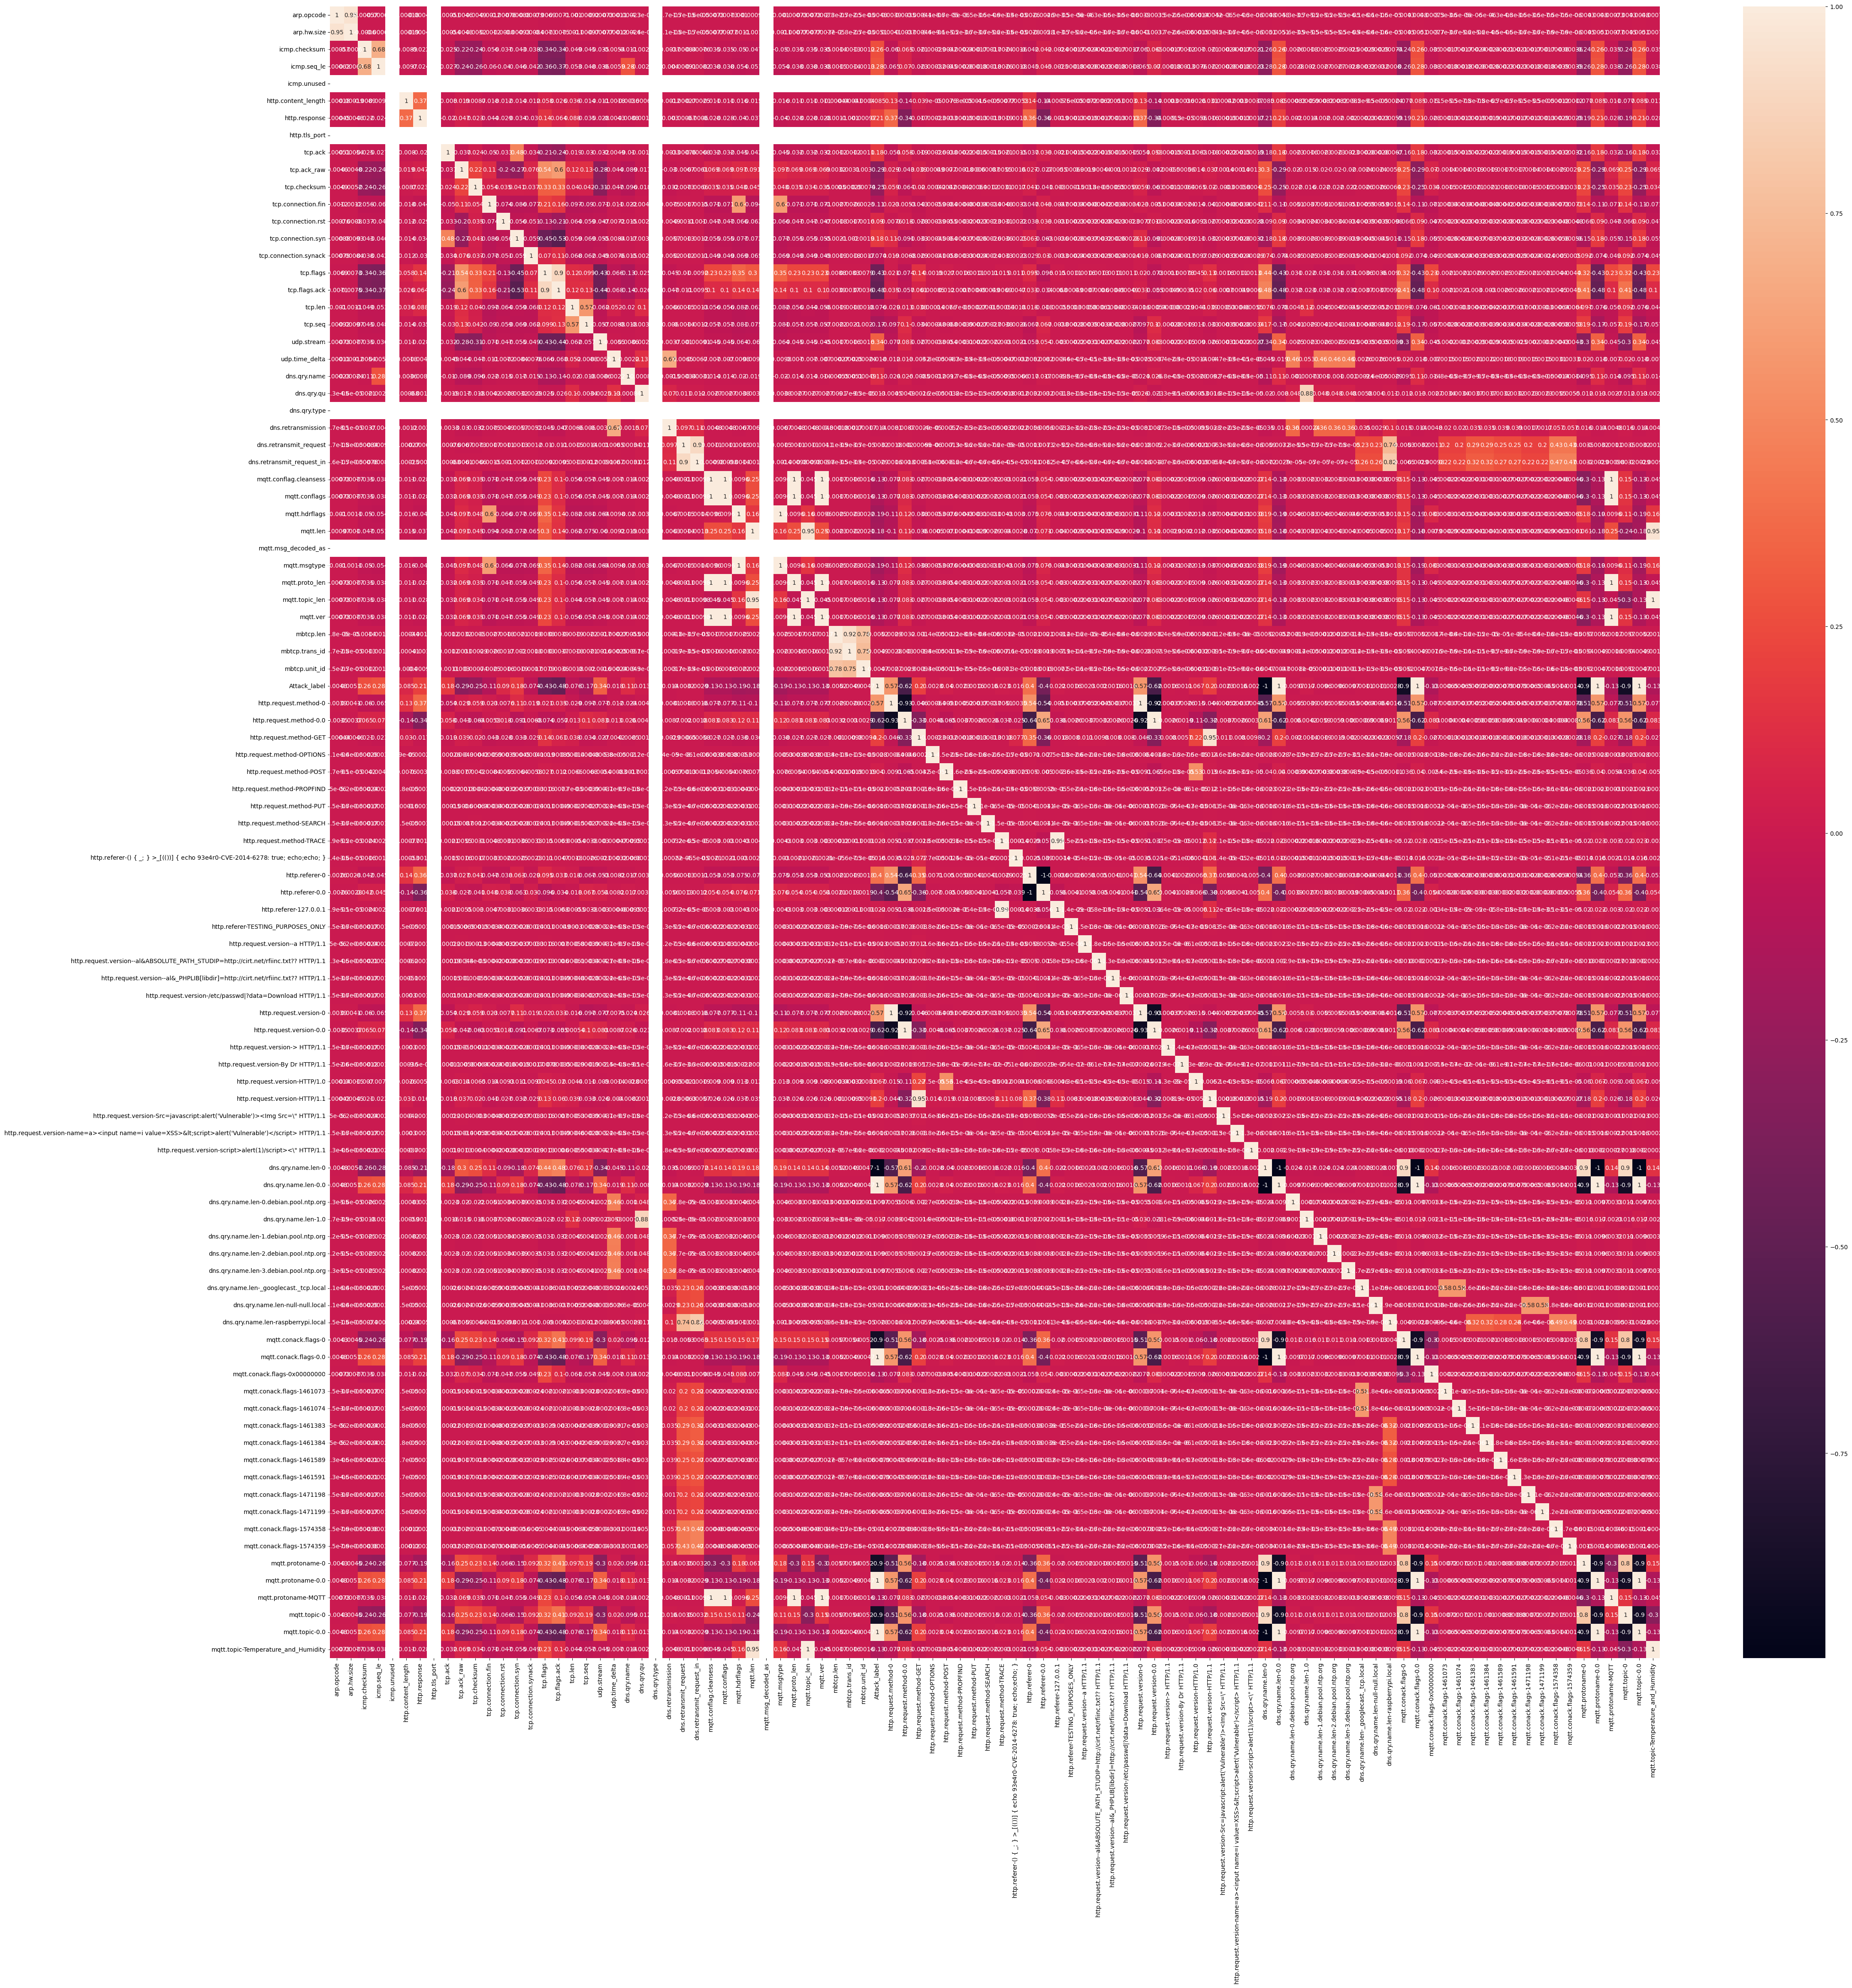

In [16]:
corr_matrix = df[feat_cols].corr()
fig = plt.figure(figsize=(50,50))
sns.heatmap(corr_matrix, annot=True)

In [17]:
skip_list = ["icmp.unused", "http.tls_port", "dns.qry.type", "mqtt.msg_decoded_as"]

In [18]:
df[skip_list[3]].value_counts()

0.0    1909671
Name: mqtt.msg_decoded_as, dtype: int64

In [19]:
df.drop(skip_list, axis=1, inplace=True)
feat_cols = list(df.columns)
feat_cols.remove(label_col)
feat_cols

['arp.opcode',
 'arp.hw.size',
 'icmp.checksum',
 'icmp.seq_le',
 'http.content_length',
 'http.response',
 'tcp.ack',
 'tcp.ack_raw',
 'tcp.checksum',
 'tcp.connection.fin',
 'tcp.connection.rst',
 'tcp.connection.syn',
 'tcp.connection.synack',
 'tcp.flags',
 'tcp.flags.ack',
 'tcp.len',
 'tcp.seq',
 'udp.stream',
 'udp.time_delta',
 'dns.qry.name',
 'dns.qry.qu',
 'dns.retransmission',
 'dns.retransmit_request',
 'dns.retransmit_request_in',
 'mqtt.conflag.cleansess',
 'mqtt.conflags',
 'mqtt.hdrflags',
 'mqtt.len',
 'mqtt.msgtype',
 'mqtt.proto_len',
 'mqtt.topic_len',
 'mqtt.ver',
 'mbtcp.len',
 'mbtcp.trans_id',
 'mbtcp.unit_id',
 'Attack_label',
 'http.request.method-0',
 'http.request.method-0.0',
 'http.request.method-GET',
 'http.request.method-OPTIONS',
 'http.request.method-POST',
 'http.request.method-PROPFIND',
 'http.request.method-PUT',
 'http.request.method-SEARCH',
 'http.request.method-TRACE',
 'http.referer-() { _; } >_[$($())] { echo 93e4r0-CVE-2014-6278: true; ech

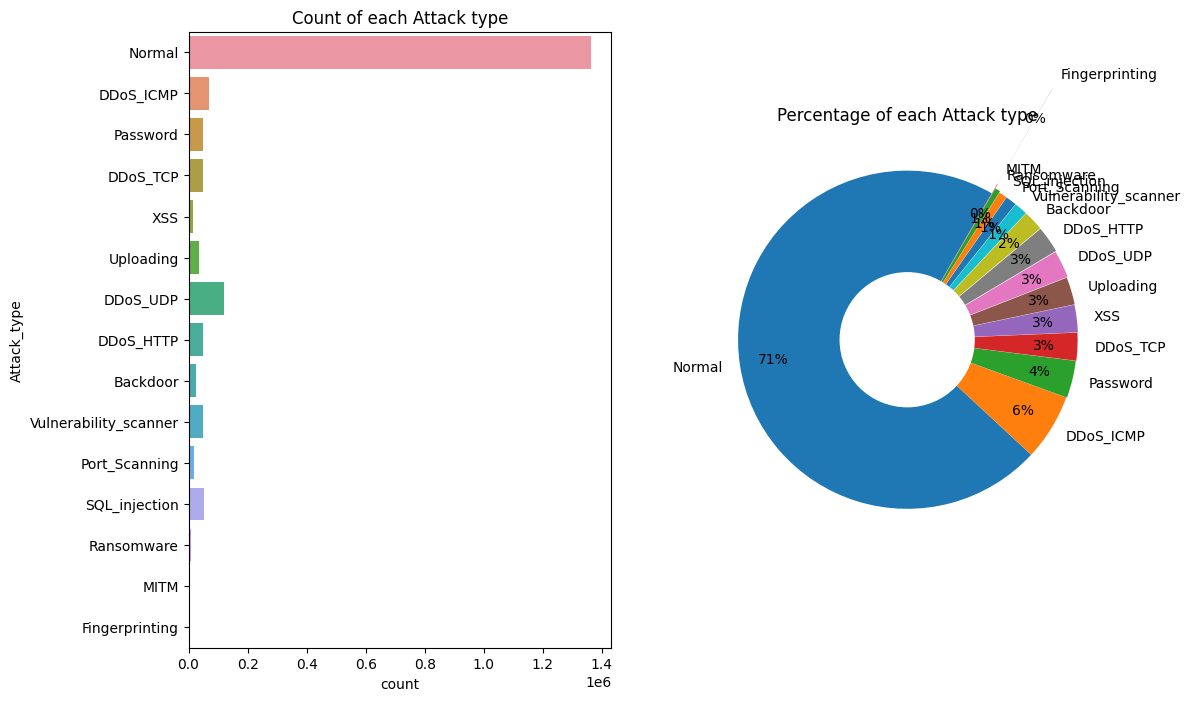

In [20]:
fig, (ax1, ax2)  = plt.subplots(nrows=1, ncols=2, figsize=(12,8))
explode = list((np.array(list(df[label_col].dropna().value_counts()))/sum(list(df[label_col].dropna().value_counts())))[::-1])[:]
labels = list(df[label_col].dropna().unique())[:]
sizes = df[label_col].value_counts()[:]

ax2.pie(sizes,  explode=explode, startangle=60, labels=labels, autopct='%1.0f%%', pctdistance=0.8)
ax2.add_artist(plt.Circle((0,0),0.4,fc='white'))
sns.countplot(y=label_col, data=df, ax=ax1)
ax1.set_title("Count of each Attack type")
ax2.set_title("Percentage of each Attack type")
plt.show()

In [21]:
X = df.drop([label_col], axis=1)
y = df[label_col]

#del df

In [22]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1, stratify=y)

#del X
#del y

In [23]:
# plt.figure(figsize=(20,200))
# tmp_df = X_train.copy()
#tmp_df[label_col] = y_train
#tmp_df = X_test.copy()
#tmp_df[label_col] = y_test
#sns.pairplot(data=tmp_df, hue=label_col, palette="Pastel2")

#del tmp_df

In [24]:
from sklearn.preprocessing import LabelEncoder


label_encoder = LabelEncoder()
y_train =  label_encoder.fit_transform(y_train)
y_test = label_encoder.transform(y_test)

In [25]:
label_encoder.classes_

array(['Backdoor', 'DDoS_HTTP', 'DDoS_ICMP', 'DDoS_TCP', 'DDoS_UDP',
       'Fingerprinting', 'MITM', 'Normal', 'Password', 'Port_Scanning',
       'Ransomware', 'SQL_injection', 'Uploading',
       'Vulnerability_scanner', 'XSS'], dtype=object)

In [26]:
from sklearn.feature_selection import mutual_info_regression

def make_mi_scores(X_feat, y_label):
    mi_scores = mutual_info_regression(X_feat, y_label, discrete_features=False)
    mi_scores = pd.Series(mi_scores, name="MI Scores", index=X_feat.columns)
    mi_scores = mi_scores.sort_values(ascending=False)
    return mi_scores

#mi_scores = make_mi_scores(X_train, y_train)
#mi_scores = make_mi_scores(X_test, y_test)

In [27]:
def plot_utility_scores(scores):
    y_scores = scores.sort_values(ascending=True)
    width = np.arange(len(y_scores))
    ticks = list(y_scores.index)
    plt.barh(width, y_scores)
    plt.yticks(width, ticks)
    plt.title("Mutual Information Scores")


#plt.figure(dpi=100, figsize=(50, 50))
#plt.xlabel("Score")
#plt.ylabel("Feature")
#plot_utility_scores(mi_scores)

In [28]:
from sklearn.manifold import TSNE
import time

In [29]:
time_start = time.time()
tsne = TSNE(n_components=2, verbose=0, perplexity=40, n_iter=10)
#tsne_results = tsne.fit_transform(X_train)
#tsne_results = tsne.fit_transform(X_test)
print('t-SNE: {} seconds'.format(time.time()-time_start))

t-SNE: 0.0009953975677490234 seconds


In [30]:
from sklearn.utils import class_weight

class_weights = class_weight.compute_class_weight('balanced',
                                                 classes=np.unique(y_train),
                                                 y=y_train)

class_weights = {k: v for k,v in enumerate(class_weights)}
class_weights

{0: 5.298843279052425,
 1: 2.622610188403931,
 2: 1.8739133901246834,
 3: 2.5430478568456096,
 4: 1.047258867764148,
 5: 149.33880742913001,
 6: 356.1156177156177,
 7: 0.09333692571528418,
 8: 2.549668719437908,
 9: 6.37273599466066,
 10: 13.140119554466091,
 11: 2.5048342801865835,
 12: 3.458842174375693,
 13: 2.544890599102138,
 14: 8.450100943057054}

In [31]:
from sklearn.model_selection import KFold

#added some parameters
kf = KFold(n_splits = 5, shuffle = True, random_state = 2)
result = next(kf.split(df), None)
print (result)

(array([      0,       1,       2, ..., 1909665, 1909666, 1909668]), array([      3,       4,      13, ..., 1909667, 1909669, 1909670]))


In [32]:
from sklearn.preprocessing import MinMaxScaler

min_max_scaler = MinMaxScaler()
X_train =  min_max_scaler.fit_transform(X_train)
X_test = min_max_scaler.transform(X_test)

In [33]:
X_train.shape,X_test.shape,y_test.shape,y_train.shape

((1527736, 92), (381935, 92), (381935,), (1527736,))

In [34]:
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

In [35]:
from sklearn.metrics import f1_score, precision_score, recall_score, accuracy_score
from sklearn.metrics import plot_confusion_matrix # will plot the confusion matrix
import time
model_performance = pd.DataFrame(columns=['Accuracy','Recall','Precision','F1-Score','time to train','time to predict','total time'])

# Naive Bayes

In [36]:
%%time
from sklearn.naive_bayes import MultinomialNB
start = time.time()
from sklearn.metrics import accuracy_score,classification_report
model_1 = MultinomialNB().fit(X_train[:1000], y_train[:1000])
end_train = time.time()
y_pred1= model_1.predict(X_test[:10000])
end_predict = time.time()

CPU times: total: 0 ns
Wall time: 7 ms


In [42]:
from sklearn.metrics import f1_score, precision_score, recall_score, classification_report, confusion_matrix,accuracy_score
accuracy = accuracy_score(y_test[:10000], y_pred1)
recall = recall_score(y_test[:10000], y_pred1, average='weighted')
precision = precision_score(y_test[:10000], y_pred1, average='weighted')
f1s = f1_score(y_test[:10000], y_pred1, average='weighted')

print("Accuracy: "+ "{:.2%}".format(accuracy))
print("Recall: "+ "{:.2%}".format(recall))
print("Precision: "+ "{:.2%}".format(precision))
print("F1-Score: "+ "{:.2%}".format(f1s))
print("time to train: "+ "{:.2f}".format(end_train-start)+" s")
print("time to predict: "+"{:.2f}".format(end_predict-end_train)+" s")
print("total: "+"{:.2f}".format(end_predict-start)+" s")
model_performance.loc['Naive Bayes'] = [accuracy, recall, precision, f1s,end_train-start,end_predict-end_train,end_predict-start]

Accuracy: 90.60%
Recall: 90.60%
Precision: 87.94%
F1-Score: 88.80%
time to train: 0.37 s
time to predict: 0.10 s
total: 0.47 s


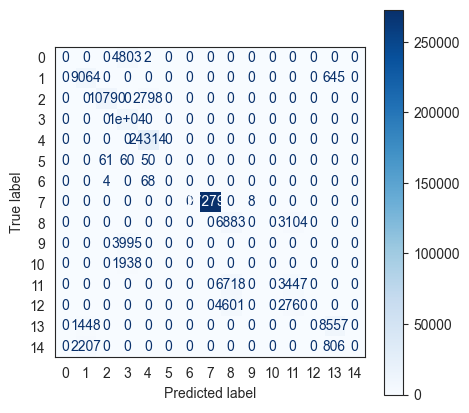

In [43]:
plt.rcParams['figure.figsize']=5,5 
sns.set_style("white")
plot_confusion_matrix(model_1, X_test, y_test, cmap=plt.cm.Blues)  
plt.show()

# Random Forrest

In [44]:
%%time
from sklearn.ensemble import RandomForestClassifier 
start = time.time()
from sklearn.metrics import accuracy_score,classification_report
model_2 = RandomForestClassifier().fit(X_train[:10000], y_train[:10000])
end_train = time.time()
y_pred2= model_2.predict(X_test[:10000])
end_predict = time.time()

CPU times: total: 500 ms
Wall time: 499 ms


In [45]:
from sklearn.metrics import f1_score, precision_score, recall_score, classification_report, confusion_matrix,accuracy_score
accuracy = accuracy_score(y_test[:10000], y_pred2)
recall = recall_score(y_test[:10000], y_pred2, average='weighted')
precision = precision_score(y_test[:10000], y_pred2, average='weighted')
f1s = f1_score(y_test[:10000], y_pred2, average='weighted')

print("Accuracy: "+ "{:.2%}".format(accuracy))
print("Recall: "+ "{:.2%}".format(recall))
print("Precision: "+ "{:.2%}".format(precision))
print("F1-Score: "+ "{:.2%}".format(f1s))
print("time to train: "+ "{:.2f}".format(end_train-start)+" s")
print("time to predict: "+"{:.2f}".format(end_predict-end_train)+" s")
print("total: "+"{:.2f}".format(end_predict-start)+" s")
model_performance.loc['Random Forest'] = [accuracy, recall, precision, f1s,end_train-start,end_predict-end_train,end_predict-start]

Accuracy: 95.38%
Recall: 95.38%
Precision: 95.76%
F1-Score: 95.21%
time to train: 0.39 s
time to predict: 0.11 s
total: 0.50 s


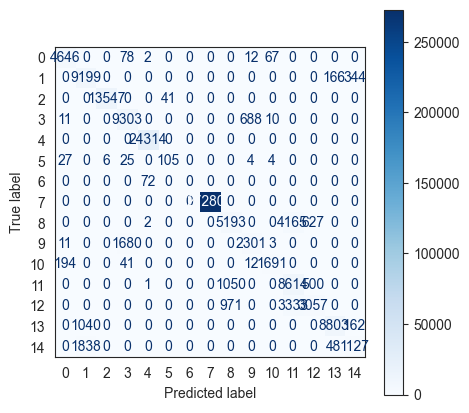

In [46]:
plt.rcParams['figure.figsize']=5,5 
sns.set_style("white")
plot_confusion_matrix(model_2, X_test, y_test, cmap=plt.cm.Blues)  
plt.show()

# CatBoost

In [47]:
%%time
from catboost import CatBoostClassifier
start = time.time()
from sklearn.metrics import accuracy_score,classification_report
model_4 = CatBoostClassifier().fit(X_train[:10000], y_train[:10000])
end_train = time.time()
y_pred4= model_4.predict(X_test[:10000])
end_predict = time.time()

Learning rate set to 0.088986
0:	learn: 1.7488097	total: 179ms	remaining: 2m 58s
1:	learn: 1.4358400	total: 204ms	remaining: 1m 41s
2:	learn: 1.2283193	total: 230ms	remaining: 1m 16s
3:	learn: 1.0768616	total: 256ms	remaining: 1m 3s
4:	learn: 0.9568863	total: 282ms	remaining: 56.1s
5:	learn: 0.8579908	total: 307ms	remaining: 50.9s
6:	learn: 0.7744634	total: 334ms	remaining: 47.4s
7:	learn: 0.7050174	total: 360ms	remaining: 44.7s
8:	learn: 0.6422194	total: 387ms	remaining: 42.6s
9:	learn: 0.5917142	total: 414ms	remaining: 40.9s
10:	learn: 0.5454529	total: 441ms	remaining: 39.6s
11:	learn: 0.5045923	total: 467ms	remaining: 38.5s
12:	learn: 0.4694138	total: 494ms	remaining: 37.5s
13:	learn: 0.4382843	total: 520ms	remaining: 36.6s
14:	learn: 0.4108234	total: 546ms	remaining: 35.8s
15:	learn: 0.3830493	total: 571ms	remaining: 35.1s
16:	learn: 0.3603253	total: 595ms	remaining: 34.4s
17:	learn: 0.3399037	total: 619ms	remaining: 33.8s
18:	learn: 0.3218712	total: 642ms	remaining: 33.2s
19:	lear

160:	learn: 0.0611237	total: 4.02s	remaining: 20.9s
161:	learn: 0.0610497	total: 4.04s	remaining: 20.9s
162:	learn: 0.0609555	total: 4.07s	remaining: 20.9s
163:	learn: 0.0606361	total: 4.09s	remaining: 20.8s
164:	learn: 0.0605260	total: 4.11s	remaining: 20.8s
165:	learn: 0.0601624	total: 4.13s	remaining: 20.8s
166:	learn: 0.0599696	total: 4.16s	remaining: 20.7s
167:	learn: 0.0598046	total: 4.18s	remaining: 20.7s
168:	learn: 0.0596128	total: 4.21s	remaining: 20.7s
169:	learn: 0.0595344	total: 4.23s	remaining: 20.7s
170:	learn: 0.0595259	total: 4.25s	remaining: 20.6s
171:	learn: 0.0594201	total: 4.28s	remaining: 20.6s
172:	learn: 0.0593499	total: 4.3s	remaining: 20.6s
173:	learn: 0.0592557	total: 4.33s	remaining: 20.5s
174:	learn: 0.0591417	total: 4.35s	remaining: 20.5s
175:	learn: 0.0590652	total: 4.37s	remaining: 20.5s
176:	learn: 0.0588755	total: 4.39s	remaining: 20.4s
177:	learn: 0.0586392	total: 4.42s	remaining: 20.4s
178:	learn: 0.0586104	total: 4.44s	remaining: 20.4s
179:	learn: 0

322:	learn: 0.0450247	total: 7.91s	remaining: 16.6s
323:	learn: 0.0449138	total: 7.94s	remaining: 16.6s
324:	learn: 0.0448755	total: 7.96s	remaining: 16.5s
325:	learn: 0.0447946	total: 7.99s	remaining: 16.5s
326:	learn: 0.0447382	total: 8.01s	remaining: 16.5s
327:	learn: 0.0446410	total: 8.03s	remaining: 16.5s
328:	learn: 0.0445737	total: 8.06s	remaining: 16.4s
329:	learn: 0.0445144	total: 8.08s	remaining: 16.4s
330:	learn: 0.0444621	total: 8.11s	remaining: 16.4s
331:	learn: 0.0444105	total: 8.13s	remaining: 16.4s
332:	learn: 0.0442737	total: 8.15s	remaining: 16.3s
333:	learn: 0.0441958	total: 8.18s	remaining: 16.3s
334:	learn: 0.0441595	total: 8.2s	remaining: 16.3s
335:	learn: 0.0441576	total: 8.22s	remaining: 16.3s
336:	learn: 0.0440501	total: 8.25s	remaining: 16.2s
337:	learn: 0.0440124	total: 8.27s	remaining: 16.2s
338:	learn: 0.0440035	total: 8.29s	remaining: 16.2s
339:	learn: 0.0439898	total: 8.32s	remaining: 16.1s
340:	learn: 0.0439820	total: 8.34s	remaining: 16.1s
341:	learn: 0

484:	learn: 0.0366574	total: 11.8s	remaining: 12.5s
485:	learn: 0.0366487	total: 11.8s	remaining: 12.5s
486:	learn: 0.0366224	total: 11.9s	remaining: 12.5s
487:	learn: 0.0365894	total: 11.9s	remaining: 12.5s
488:	learn: 0.0365373	total: 11.9s	remaining: 12.4s
489:	learn: 0.0365176	total: 11.9s	remaining: 12.4s
490:	learn: 0.0364924	total: 12s	remaining: 12.4s
491:	learn: 0.0364757	total: 12s	remaining: 12.4s
492:	learn: 0.0364590	total: 12s	remaining: 12.4s
493:	learn: 0.0364112	total: 12s	remaining: 12.3s
494:	learn: 0.0363635	total: 12.1s	remaining: 12.3s
495:	learn: 0.0363401	total: 12.1s	remaining: 12.3s
496:	learn: 0.0362974	total: 12.1s	remaining: 12.3s
497:	learn: 0.0362804	total: 12.1s	remaining: 12.2s
498:	learn: 0.0362442	total: 12.2s	remaining: 12.2s
499:	learn: 0.0362087	total: 12.2s	remaining: 12.2s
500:	learn: 0.0361849	total: 12.2s	remaining: 12.2s
501:	learn: 0.0361530	total: 12.2s	remaining: 12.1s
502:	learn: 0.0361277	total: 12.3s	remaining: 12.1s
503:	learn: 0.036110

647:	learn: 0.0314590	total: 15.7s	remaining: 8.53s
648:	learn: 0.0314413	total: 15.7s	remaining: 8.51s
649:	learn: 0.0313986	total: 15.8s	remaining: 8.48s
650:	learn: 0.0313802	total: 15.8s	remaining: 8.46s
651:	learn: 0.0313479	total: 15.8s	remaining: 8.43s
652:	learn: 0.0313225	total: 15.8s	remaining: 8.41s
653:	learn: 0.0313074	total: 15.8s	remaining: 8.38s
654:	learn: 0.0312771	total: 15.9s	remaining: 8.36s
655:	learn: 0.0312525	total: 15.9s	remaining: 8.34s
656:	learn: 0.0312409	total: 15.9s	remaining: 8.31s
657:	learn: 0.0312286	total: 15.9s	remaining: 8.29s
658:	learn: 0.0312004	total: 16s	remaining: 8.26s
659:	learn: 0.0311713	total: 16s	remaining: 8.24s
660:	learn: 0.0311580	total: 16s	remaining: 8.21s
661:	learn: 0.0311393	total: 16s	remaining: 8.19s
662:	learn: 0.0311195	total: 16.1s	remaining: 8.16s
663:	learn: 0.0311013	total: 16.1s	remaining: 8.14s
664:	learn: 0.0310810	total: 16.1s	remaining: 8.11s
665:	learn: 0.0310613	total: 16.1s	remaining: 8.09s
666:	learn: 0.031044

809:	learn: 0.0280552	total: 19.6s	remaining: 4.59s
810:	learn: 0.0280402	total: 19.6s	remaining: 4.56s
811:	learn: 0.0280300	total: 19.6s	remaining: 4.54s
812:	learn: 0.0279935	total: 19.6s	remaining: 4.51s
813:	learn: 0.0279751	total: 19.7s	remaining: 4.49s
814:	learn: 0.0279671	total: 19.7s	remaining: 4.47s
815:	learn: 0.0279370	total: 19.7s	remaining: 4.44s
816:	learn: 0.0279113	total: 19.7s	remaining: 4.42s
817:	learn: 0.0279011	total: 19.8s	remaining: 4.39s
818:	learn: 0.0278682	total: 19.8s	remaining: 4.37s
819:	learn: 0.0278486	total: 19.8s	remaining: 4.35s
820:	learn: 0.0278088	total: 19.8s	remaining: 4.32s
821:	learn: 0.0277895	total: 19.9s	remaining: 4.3s
822:	learn: 0.0277763	total: 19.9s	remaining: 4.27s
823:	learn: 0.0277691	total: 19.9s	remaining: 4.25s
824:	learn: 0.0277384	total: 19.9s	remaining: 4.23s
825:	learn: 0.0277153	total: 19.9s	remaining: 4.2s
826:	learn: 0.0276979	total: 20s	remaining: 4.18s
827:	learn: 0.0276925	total: 20s	remaining: 4.15s
828:	learn: 0.0276

973:	learn: 0.0251533	total: 23.5s	remaining: 626ms
974:	learn: 0.0251450	total: 23.5s	remaining: 602ms
975:	learn: 0.0251283	total: 23.5s	remaining: 578ms
976:	learn: 0.0251187	total: 23.5s	remaining: 554ms
977:	learn: 0.0251017	total: 23.6s	remaining: 530ms
978:	learn: 0.0250930	total: 23.6s	remaining: 506ms
979:	learn: 0.0250843	total: 23.6s	remaining: 482ms
980:	learn: 0.0250633	total: 23.6s	remaining: 458ms
981:	learn: 0.0250489	total: 23.7s	remaining: 434ms
982:	learn: 0.0250353	total: 23.7s	remaining: 409ms
983:	learn: 0.0250248	total: 23.7s	remaining: 385ms
984:	learn: 0.0250049	total: 23.7s	remaining: 361ms
985:	learn: 0.0249985	total: 23.7s	remaining: 337ms
986:	learn: 0.0249714	total: 23.8s	remaining: 313ms
987:	learn: 0.0249526	total: 23.8s	remaining: 289ms
988:	learn: 0.0249471	total: 23.8s	remaining: 265ms
989:	learn: 0.0249360	total: 23.8s	remaining: 241ms
990:	learn: 0.0249223	total: 23.9s	remaining: 217ms
991:	learn: 0.0249006	total: 23.9s	remaining: 193ms
992:	learn: 

In [48]:
from sklearn.metrics import f1_score, precision_score, recall_score, classification_report, confusion_matrix,accuracy_score
accuracy = accuracy_score(y_test[:10000], y_pred4)
recall = recall_score(y_test[:10000], y_pred4, average='weighted')
precision = precision_score(y_test[:10000], y_pred4, average='weighted')
f1s = f1_score(y_test[:10000], y_pred4, average='weighted')

print("Accuracy: "+ "{:.2%}".format(accuracy))
print("Recall: "+ "{:.2%}".format(recall))
print("Precision: "+ "{:.2%}".format(precision))
print("F1-Score: "+ "{:.2%}".format(f1s))
print("time to train: "+ "{:.2f}".format(end_train-start)+" s")
print("time to predict: "+"{:.2f}".format(end_predict-end_train)+" s")
print("total: "+"{:.2f}".format(end_predict-start)+" s")
model_performance.loc['Cat-Boost'] = [accuracy, recall, precision, f1s,end_train-start,end_predict-end_train,end_predict-start]

Accuracy: 98.09%
Recall: 98.09%
Precision: 98.12%
F1-Score: 98.08%
time to train: 24.55 s
time to predict: 0.19 s
total: 24.74 s


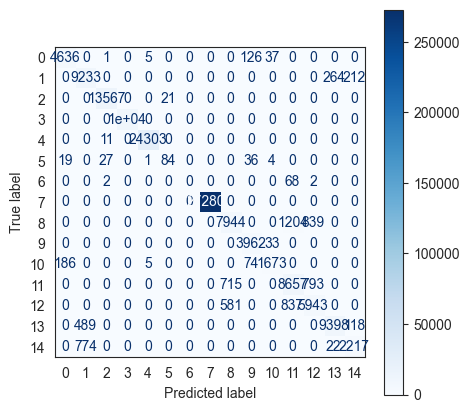

In [49]:
plt.rcParams['figure.figsize']=5,5 
sns.set_style("white")
plot_confusion_matrix(model_4, X_test, y_test, cmap=plt.cm.Blues)  
plt.show()

# KNN

In [50]:
%%time
from sklearn.neighbors import KNeighborsClassifier
start = time.time()
from sklearn.metrics import accuracy_score,classification_report
model_5 = KNeighborsClassifier(n_neighbors=10).fit(X_train[:10000], y_train[:10000])
end_train = time.time()
y_pred5= model_5.predict(X_test[:10000])
end_predict = time.time()

CPU times: total: 5.44 s
Wall time: 435 ms


In [51]:
from sklearn.metrics import f1_score, precision_score, recall_score, classification_report, confusion_matrix,accuracy_score
accuracy = accuracy_score(y_test[:10000], y_pred5)
recall = recall_score(y_test[:10000], y_pred5, average='weighted')
precision = precision_score(y_test[:10000], y_pred5, average='weighted')
f1s = f1_score(y_test[:10000], y_pred5, average='weighted')

print("Accuracy: "+ "{:.2%}".format(accuracy))
print("Recall: "+ "{:.2%}".format(recall))
print("Precision: "+ "{:.2%}".format(precision))
print("F1-Score: "+ "{:.2%}".format(f1s))
print("time to train: "+ "{:.2f}".format(end_train-start)+" s")
print("time to predict: "+"{:.2f}".format(end_predict-end_train)+" s")
print("total: "+"{:.2f}".format(end_predict-start)+" s")
model_performance.loc['K-Nearest Neighbors'] = [accuracy, recall, precision, f1s,end_train-start,end_predict-end_train,end_predict-start]

Accuracy: 93.12%
Recall: 93.12%
Precision: 92.46%
F1-Score: 92.48%
time to train: 0.00 s
time to predict: 0.43 s
total: 0.44 s


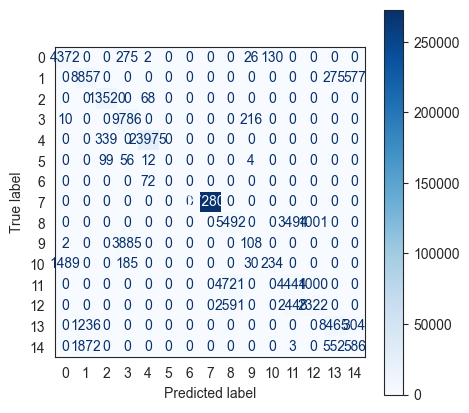

In [52]:
plt.rcParams['figure.figsize']=5,5 
sns.set_style("white")
plot_confusion_matrix(model_5, X_test, y_test, cmap=plt.cm.Blues)  
plt.show()

# Decision Tree

In [53]:
%%time
from sklearn.tree import DecisionTreeClassifier
start = time.time()
from sklearn.metrics import accuracy_score,classification_report
model_6 = DecisionTreeClassifier(criterion='gini', max_depth=4, random_state=0).fit(X_train[:10000], y_train[:10000])
end_train = time.time()
y_pred6= model_6.predict(X_test[:10000])
end_predict = time.time()

CPU times: total: 15.6 ms
Wall time: 15 ms


In [54]:
from sklearn.metrics import f1_score, precision_score, recall_score, classification_report, confusion_matrix,accuracy_score
accuracy = accuracy_score(y_test[:10000], y_pred6)
recall = recall_score(y_test[:10000], y_pred6, average='weighted')
precision = precision_score(y_test[:10000], y_pred6, average='weighted')
f1s = f1_score(y_test[:10000], y_pred6, average='weighted')

print("Accuracy: "+ "{:.2%}".format(accuracy))
print("Recall: "+ "{:.2%}".format(recall))
print("Precision: "+ "{:.2%}".format(precision))
print("F1-Score: "+ "{:.2%}".format(f1s))
print("time to train: "+ "{:.2f}".format(end_train-start)+" s")
print("time to predict: "+"{:.2f}".format(end_predict-end_train)+" s")
print("total: "+"{:.2f}".format(end_predict-start)+" s")
model_performance.loc['Decision Tree'] = [accuracy, recall, precision, f1s,end_train-start,end_predict-end_train,end_predict-start]

Accuracy: 86.88%
Recall: 86.88%
Precision: 83.45%
F1-Score: 84.23%
time to train: 0.01 s
time to predict: 0.00 s
total: 0.02 s


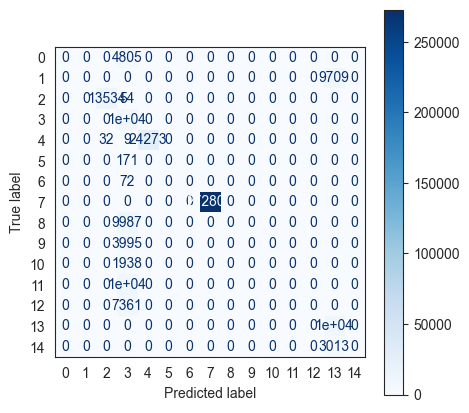

In [55]:
plt.rcParams['figure.figsize']=5,5 
sns.set_style("white")
plot_confusion_matrix(model_6, X_test, y_test, cmap=plt.cm.Blues)  
plt.show()

# AdaBoost

In [56]:
%%time
from sklearn.ensemble import AdaBoostClassifier
start = time.time()
from sklearn.metrics import accuracy_score,classification_report
model_7 = AdaBoostClassifier(n_estimators=100, learning_rate=0.5, random_state=0).fit(X_train[:10000], y_train[:10000])
end_train = time.time()
y_pred7= model_7.predict(X_test[:10000])
end_predict = time.time()

CPU times: total: 1.8 s
Wall time: 1.81 s


In [57]:
from sklearn.metrics import f1_score, precision_score, recall_score, classification_report, confusion_matrix,accuracy_score
accuracy = accuracy_score(y_test[:10000], y_pred7)
recall = recall_score(y_test[:10000], y_pred7, average='weighted')
precision = precision_score(y_test[:10000], y_pred7, average='weighted')
f1s = f1_score(y_test[:10000], y_pred7, average='weighted')

print("Accuracy: "+ "{:.2%}".format(accuracy))
print("Recall: "+ "{:.2%}".format(recall))
print("Precision: "+ "{:.2%}".format(precision))
print("F1-Score: "+ "{:.2%}".format(f1s))
print("time to train: "+ "{:.2f}".format(end_train-start)+" s")
print("time to predict: "+"{:.2f}".format(end_predict-end_train)+" s")
print("total: "+"{:.2f}".format(end_predict-start)+" s")
model_performance.loc['AdaBoost'] = [accuracy, recall, precision, f1s,end_train-start,end_predict-end_train,end_predict-start]

Accuracy: 90.19%
Recall: 90.19%
Precision: 89.19%
F1-Score: 88.24%
time to train: 1.37 s
time to predict: 0.44 s
total: 1.81 s


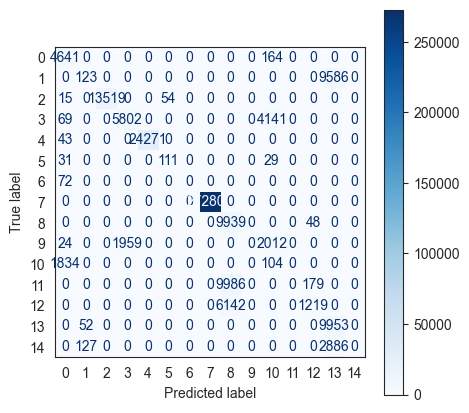

In [58]:
plt.rcParams['figure.figsize']=5,5 
sns.set_style("white")
plot_confusion_matrix(model_7, X_test, y_test, cmap=plt.cm.Blues)  
plt.show()

# Reshaping data for CNNLSTM

In [59]:
X_train2 = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test2 = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

In [60]:
input_shape = X_train2.shape[1:]

In [61]:
print(X_train2.shape, X_test2.shape)
print(input_shape)

(1527736, 92, 1) (381935, 92, 1)
(92, 1)


In [62]:
num_classes = len(np.unique(y_train))
num_classes

15

In [63]:
from  tensorflow.keras.utils import to_categorical 

y_train2 = to_categorical(y_train, num_classes=num_classes)
y_test2 = to_categorical(y_test, num_classes=num_classes)

#y_train = y_train.reshape(-1,1)
#y_test = y_test.reshape(-1,1)

In [64]:
print(y_train2.shape, y_test2.shape)

(1527736, 15) (381935, 15)


# CNLSTM

In [65]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout, TimeDistributed, Conv1D, MaxPooling1D, Flatten, Bidirectional, Input, Flatten, Activation, Reshape, RepeatVector, Concatenate
from tensorflow.keras.models import Model
from tensorflow.keras.utils import plot_model
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint
from keras.layers import Conv2D, Conv1D, MaxPooling2D, MaxPooling1D, Flatten, BatchNormalization, Dense
from keras.utils.np_utils import to_categorical
from keras.models import Sequential
from keras.callbacks import CSVLogger, ModelCheckpoint

In [66]:
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM,Dropout

tf.random.set_seed(51)
np.random.seed(51)

n_timesteps = X_train2.shape[1]
n_products = X_train2.shape[2]


model = tf.keras.models.Sequential([
    tf.keras.layers.Conv1D(filters=128, kernel_size=7,
                      strides=1, padding="causal",
                      activation="relu",
                      input_shape=(n_timesteps, n_products)),
    tf.keras.layers.MaxPooling1D(),
    tf.keras.layers.Conv1D(filters=64, kernel_size=7, 
                           strides=1, activation='relu', padding="causal"),
    tf.keras.layers.MaxPooling1D(),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(512, return_sequences=True)),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(256, return_sequences=True)),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(128)),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dense(15)
])


opt_adam = tf.keras.optimizers.Adam(clipvalue=0.5)

model.compile(loss='mse',
              optimizer=opt_adam, 
              metrics=[tf.keras.metrics.RootMeanSquaredError()])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 92, 128)           1024      
                                                                 
 max_pooling1d (MaxPooling1D  (None, 46, 128)          0         
 )                                                               
                                                                 
 conv1d_1 (Conv1D)           (None, 46, 64)            57408     
                                                                 
 max_pooling1d_1 (MaxPooling  (None, 23, 64)           0         
 1D)                                                             
                                                                 
 bidirectional (Bidirectiona  (None, 23, 1024)         2363392   
 l)                                                              
                                                        

In [67]:
from keras.callbacks import EarlyStopping
from keras.callbacks import ModelCheckpoint

es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=100)

In [68]:
epochs = 10
batch_size = 100
model.fit(X_train2[:10000], y_train2[:10000], epochs = epochs, batch_size = batch_size)

Epoch 1/10
100/100 [==============================] - 74s 684ms/step - loss: 0.1182 - root_mean_squared_error: 0.3439
Epoch 2/10
100/100 [==============================] - 68s 678ms/step - loss: 0.0110 - root_mean_squared_error: 0.1051
Epoch 3/10
100/100 [==============================] - 68s 676ms/step - loss: 0.0101 - root_mean_squared_error: 0.1004
Epoch 4/10
100/100 [==============================] - 68s 681ms/step - loss: 0.0094 - root_mean_squared_error: 0.0968
Epoch 5/10
100/100 [==============================] - 67s 673ms/step - loss: 0.0091 - root_mean_squared_error: 0.0956
Epoch 6/10
100/100 [==============================] - 67s 674ms/step - loss: 0.0086 - root_mean_squared_error: 0.0928
Epoch 7/10
100/100 [==============================] - 68s 679ms/step - loss: 0.0086 - root_mean_squared_error: 0.0930
Epoch 8/10
100/100 [==============================] - 68s 680ms/step - loss: 0.0083 - root_mean_squared_error: 0.0909
Epoch 9/10
100/100 [==============================] - 68

In [78]:
model.save('CNNLSTM.h5')

In [79]:
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import cross_val_score

In [69]:
y_hat = model.predict(X_test2[:10000])

313/313 [==============================] - 44s 136ms/step


In [70]:
y_hat = np.argmax(y_hat, axis=1)
y_true = np.argmax(y_test2, axis=1)

In [66]:
y_true_ohe = to_categorical(y_true[:10000], num_classes=num_classes)
y_hat_ohe =  to_categorical(y_hat, num_classes=num_classes)

In [67]:
from sklearn.metrics import roc_curve, auc
from itertools import cycle


def ROC_plot(y_true_ohe, y_hat_ohe, label_encoder, n_classes):    
    lw = 2
    fpr = dict()
    tpr = dict()
    roc_auc = dict()
    for i in range(n_classes):
        fpr[i], tpr[i], _ = roc_curve(y_true_ohe[:, i], y_hat_ohe[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])
                                  
    all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))

    mean_tpr = np.zeros_like(all_fpr)
    for i in range(n_classes):
        mean_tpr += np.interp(all_fpr, fpr[i], tpr[i])

    mean_tpr /= n_classes
    fpr["macro"] = all_fpr
    tpr["macro"] = mean_tpr
    roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

    fpr["micro"], tpr["micro"], _ = roc_curve(y_true_ohe.ravel(), y_hat_ohe.ravel())
    roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])
    
    plt.figure(figsize=(20,20))
    plt.plot(
        fpr["micro"],
        tpr["micro"],
        label="micro-average ROC curve (area = {0:0.2f})".format(roc_auc["micro"]),
        color="deeppink",
        linestyle=":",
        linewidth=4,
    )

    plt.plot(
        fpr["macro"],
        tpr["macro"],
        label="macro-average ROC curve (area = {0:0.2f})".format(roc_auc["macro"]),
        color="navy",
        linestyle=":",
        linewidth=4,
    )

    colors = cycle(["aqua", "darkorange", "cornflowerblue"])
    for i, color in zip(range(n_classes), colors):
        plt.plot(
            fpr[i],
            tpr[i],
            color=color,
            lw=lw,
            label="ROC curve of class {0} (area = {1:0.2f})".format(label_encoder.classes_[i], roc_auc[i]))

    plt.plot([0, 1], [0, 1], "k--", lw=lw)
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title("multiclass characteristic")
    plt.legend(loc="lower right")
    plt.show()

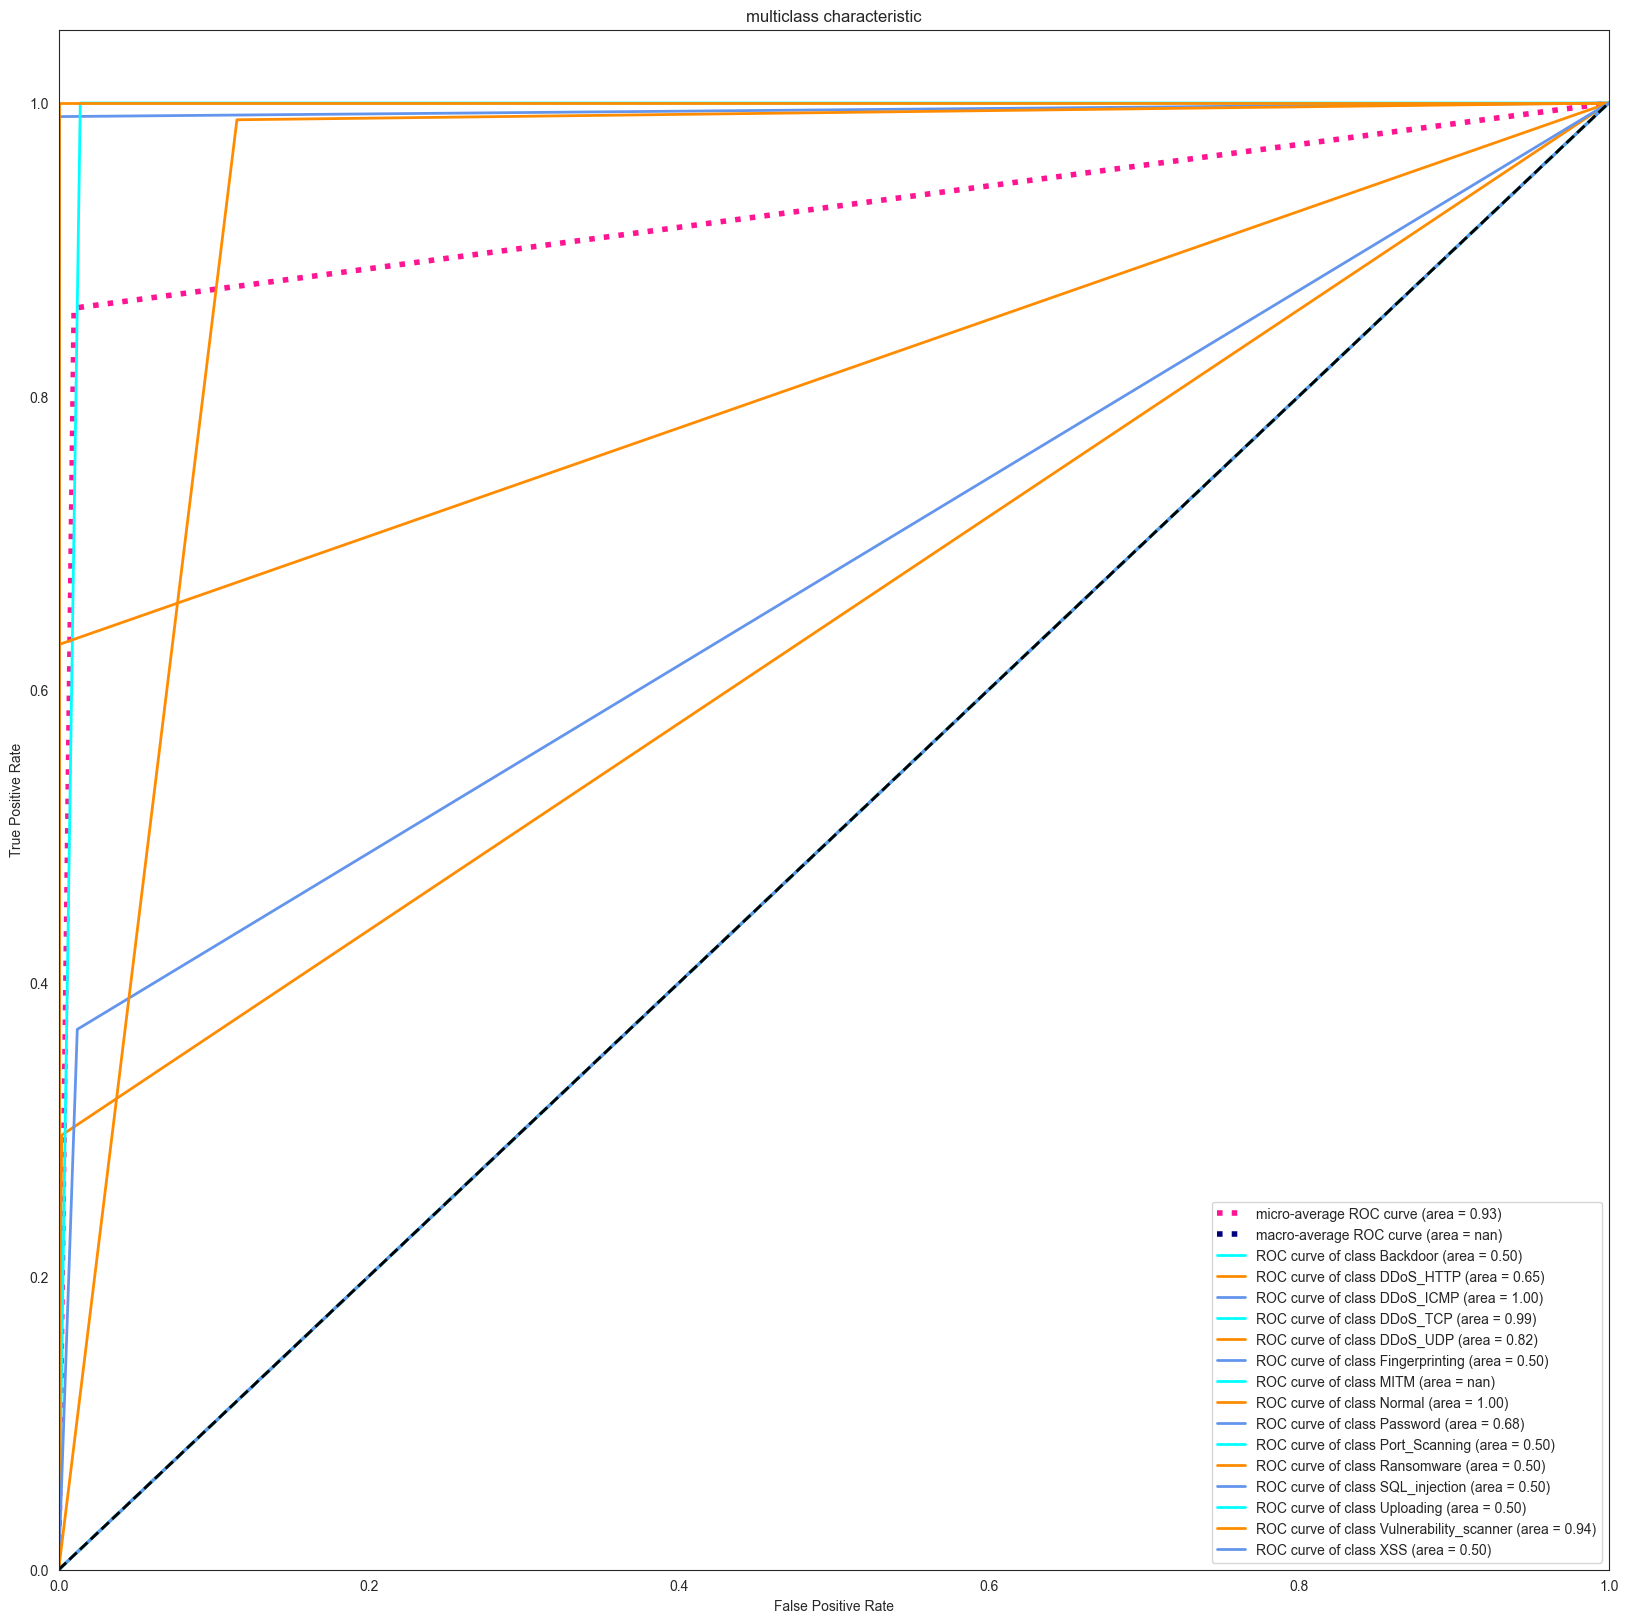

In [68]:
ROC_plot(y_true_ohe, y_hat_ohe, label_encoder, num_classes)

In [69]:
from sklearn.metrics import accuracy_score, precision_recall_fscore_support,confusion_matrix, classification_report, precision_score, recall_score
from sklearn.metrics import f1_score as f1_score_rep
import seaborn as sn

def print_score(y_pred, y_real, label_encoder):
    print("Accuracy: ", accuracy_score(y_real[:10000], y_pred[:10000]))
    print("Precision:: ", precision_score(y_real[:10000], y_pred[:10000], average="micro"))
    print("Recall:: ", recall_score(y_real[:10000], y_pred[:10000], average="micro"))
    print("F1_Score:: ", f1_score_rep(y_real[:10000], y_pred[:10000], average="micro"))

    print()
    print("Macro precision_recall_fscore_support (macro) average")
    print(precision_recall_fscore_support(y_real[:10000], y_pred[:10000], average="macro"))

    print()
    print("Macro precision_recall_fscore_support (micro) average")
    print(precision_recall_fscore_support(y_real[:10000], y_pred[:10000], average="micro"))

    print()
    print("Macro precision_recall_fscore_support (weighted) average")
    print(precision_recall_fscore_support(y_real[:10000], y_pred[:10000], average="weighted"))

In [70]:
print_score(y_hat, y_true, label_encoder)

Accuracy:  0.8602
Precision::  0.8602
Recall::  0.8602
F1_Score::  0.8602

Macro precision_recall_fscore_support (macro) average
(0.3614414627353111, 0.37677167978422293, 0.3355451525919732, None)

Macro precision_recall_fscore_support (micro) average
(0.8602, 0.8602, 0.8602, None)

Macro precision_recall_fscore_support (weighted) average
(0.8694661782336636, 0.8602, 0.8510382976095047, None)


In [71]:
y_true.shape,y_hat.shape

((381935,), (10000,))

In [72]:
label_encoder.classes_

array(['Backdoor', 'DDoS_HTTP', 'DDoS_ICMP', 'DDoS_TCP', 'DDoS_UDP',
       'Fingerprinting', 'MITM', 'Normal', 'Password', 'Port_Scanning',
       'Ransomware', 'SQL_injection', 'Uploading',
       'Vulnerability_scanner', 'XSS'], dtype=object)


Confusion Matrix

Classification Report
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       130
           1       0.79      0.30      0.43       243
           2       0.98      0.99      0.99       325
           3       0.64      1.00      0.78       245
           4       1.00      0.63      0.77       677
           5       0.00      0.00      0.00         5
           7       1.00      1.00      1.00      7178
           8       0.46      0.37      0.41       266
           9       0.00      0.00      0.00       117
          10       0.00      0.00      0.00        52
          11       0.00      0.00      0.00       231
          12       0.00      0.00      0.00       176
          13       0.19      0.99      0.32       263
          14       0.00      0.00      0.00        92

    accuracy                           0.86     10000
   macro avg       0.36      0.38      0.34     10000
weighted avg       0.87      0.86      

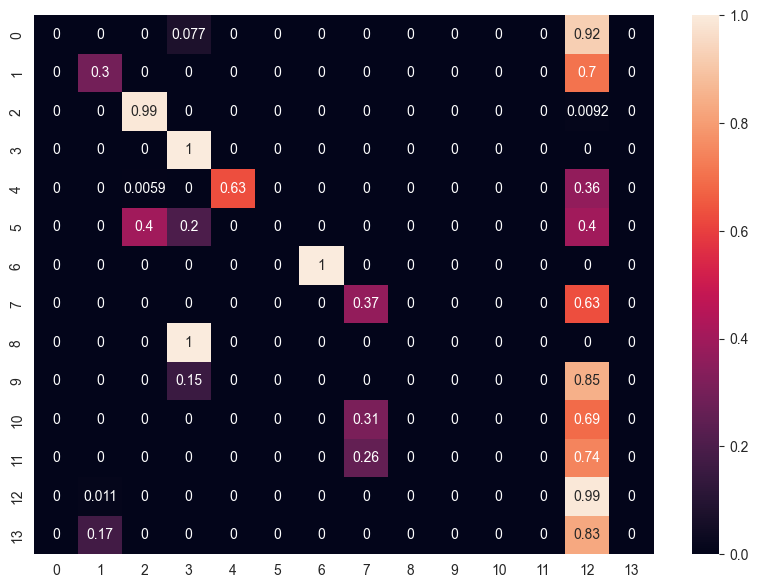

In [73]:
print()
print("Confusion Matrix")
cm = confusion_matrix(y_true[:10000], y_hat[:10000])
cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
#df_cm = pd.DataFrame(cm, index = [i for i in label_encoder.classes_],
#        columns = [i for i in label_encoder.classes_])
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True)

print()
print("Classification Report")
print(classification_report(y_true[:10000], y_hat))#, target_names=label_encoder.classes_))

# OPTIMIZERS

In [74]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.svm import SVC
from sklearn.dummy import DummyClassifier
from niapy.problems import Problem
from niapy.task import Task
from niapy.algorithms.basic import ArtificialBeeColonyAlgorithm
from mealpy.math_based.SCA import BaseSCA
import numpy as np

In [75]:
def fitness_function(solution):
    return np.sum(solution**2)

In [76]:
def obj_function(solution):
    def booth(x, y):
        return (x + 2*y - 7)**2 + (2*x + y - 5)**2
    def bukin(x, y):
        return 100 * np.sqrt(np.abs(y - 0.01 * x**2)) + 0.01 * np.abs(x + 10)
    def matyas(x, y):
        return 0.26 * (x**2 + y**2) - 0.48 * x * y
    return [booth(solution[0], solution[1]), bukin(solution[0], solution[1]), matyas(solution[0], solution[1])]
epoch = 1000
pop_size = 50
n_elites = 16
n_others = 4
patch_size = 5.0
patch_reduction = 0.985
n_sites = 3
n_elite_sites = 1

In [77]:
problem_dict1 = {
    "fit_func": fitness_function,
    "lb": [-10, -15, -4, -2, -8],
    "ub": [10, 15, 12, 8, 20],
    "minmax": "min",
}

In [78]:
class OptimumSelection(Problem):
    def __init__(self, X_train, y_train, alpha=0.99):
        super().__init__(dimension = X_train.shape[1], lower=0, upper=1)
        self.X_train = X_train
        self.y_train = y_train
        self.alpha = alpha

    def _evaluate(self, x):
        selected = x > 0.5
        num_selected = selected.sum()
        if num_selected == 0:
            return 1.0
        accuracy = cross_val_score(RandomForestClassifier(), self.X_train[:, selected], self.y_train, cv=2, n_jobs=-1).mean()
        score = 1 - accuracy
        num_features = self.X_train.shape[1]
        return self.alpha * score + (1 - self.alpha) * (num_selected / num_features)

In [79]:
X_train.shape,y_train.shape

((1527736, 92), (1527736,))

In [80]:
X_train=np.array(X_train)
y_train=np.array(y_train)

In [81]:
type(X_train),type(y_train)

(numpy.ndarray, numpy.ndarray)

In [82]:
problem = OptimumSelection(X_train[:10000], y_train[:10000])
task = Task(problem, max_iters=100)
algorithm =  ArtificialBeeColonyAlgorithm(population_size=40, limit=2)

In [83]:
best_features, best_fitness = algorithm.run(task)
print(f"Solution: {best_features}, Fitness: {best_fitness}")

Solution: [3.68899262e-01 8.82222826e-01 9.63815816e-01 3.41405732e-01
 3.46062720e-01 1.31377996e-01 9.23530130e-01 6.30734444e-01
 4.25184428e-02 6.51967919e-01 9.58019079e-01 2.63929397e-01
 4.54137642e-01 9.22146664e-01 8.65923499e-01 6.74422086e-01
 8.47214408e-01 4.57732337e-01 3.97128909e-01 4.75115853e-02
 7.79183680e-01 9.75115753e-01 8.73748780e-01 1.93207236e-01
 7.12863740e-01 3.99972639e-01 8.16908268e-01 6.24439845e-01
 6.06951763e-02 5.12804917e-01 1.92146774e-01 6.38340812e-04
 4.02435964e-01 8.66298464e-01 4.30108850e-01 2.24078077e-02
 2.28062567e-01 5.45913384e-01 1.65285924e-01 6.82134736e-01
 1.86873342e-01 4.56095489e-01 2.85985066e-01 4.05839536e-02
 8.31316587e-01 2.01544142e-01 8.03467938e-01 7.80586728e-01
 8.58501371e-01 4.83909945e-01 1.72822736e-01 9.59579905e-01
 4.75253338e-01 5.52336710e-01 7.51038403e-01 2.27217719e-01
 8.00386405e-01 6.81587780e-01 3.87204627e-01 2.85146812e-01
 8.33489115e-01 3.28084433e-01 7.38833487e-01 7.11510710e-01
 6.47652917e-0

INFO:mealpy.math_based.SCA.BaseSCA:Solving single objective optimization problem.
INFO:mealpy.math_based.SCA.BaseSCA:>Problem: P, Epoch: 1, Current best: 47.475110880941806, Global best: 47.475110880941806, Runtime: 0.00363 seconds
INFO:mealpy.math_based.SCA.BaseSCA:>Problem: P, Epoch: 2, Current best: 34.12274128165559, Global best: 34.12274128165559, Runtime: 0.00571 seconds
INFO:mealpy.math_based.SCA.BaseSCA:>Problem: P, Epoch: 3, Current best: 5.017307637183363, Global best: 5.017307637183363, Runtime: 0.00359 seconds
INFO:mealpy.math_based.SCA.BaseSCA:>Problem: P, Epoch: 4, Current best: 5.017307637183363, Global best: 5.017307637183363, Runtime: 0.00364 seconds
INFO:mealpy.math_based.SCA.BaseSCA:>Problem: P, Epoch: 5, Current best: 5.017307637183363, Global best: 5.017307637183363, Runtime: 0.00334 seconds
INFO:mealpy.math_based.SCA.BaseSCA:>Problem: P, Epoch: 6, Current best: 5.017307637183363, Global best: 5.017307637183363, Runtime: 0.00312 seconds
INFO:mealpy.math_based.SCA.B

INFO:mealpy.math_based.SCA.BaseSCA:>Problem: P, Epoch: 54, Current best: 2.8337885550062554e-09, Global best: 2.8337885550062554e-09, Runtime: 0.00340 seconds
INFO:mealpy.math_based.SCA.BaseSCA:>Problem: P, Epoch: 55, Current best: 2.8337885550062554e-09, Global best: 2.8337885550062554e-09, Runtime: 0.00333 seconds
INFO:mealpy.math_based.SCA.BaseSCA:>Problem: P, Epoch: 56, Current best: 2.267088139502396e-09, Global best: 2.267088139502396e-09, Runtime: 0.00481 seconds
INFO:mealpy.math_based.SCA.BaseSCA:>Problem: P, Epoch: 57, Current best: 1.8571081649606674e-09, Global best: 1.8571081649606674e-09, Runtime: 0.00350 seconds
INFO:mealpy.math_based.SCA.BaseSCA:>Problem: P, Epoch: 58, Current best: 1.458998634304138e-09, Global best: 1.458998634304138e-09, Runtime: 0.00338 seconds
INFO:mealpy.math_based.SCA.BaseSCA:>Problem: P, Epoch: 59, Current best: 4.2570354545901215e-10, Global best: 4.2570354545901215e-10, Runtime: 0.00387 seconds
INFO:mealpy.math_based.SCA.BaseSCA:>Problem: P, Ep

INFO:mealpy.math_based.SCA.BaseSCA:>Problem: P, Epoch: 106, Current best: 5.4414266079946335e-17, Global best: 5.4414266079946335e-17, Runtime: 0.00319 seconds
INFO:mealpy.math_based.SCA.BaseSCA:>Problem: P, Epoch: 107, Current best: 1.7091943867501447e-17, Global best: 1.7091943867501447e-17, Runtime: 0.00339 seconds
INFO:mealpy.math_based.SCA.BaseSCA:>Problem: P, Epoch: 108, Current best: 1.4413407224896588e-17, Global best: 1.4413407224896588e-17, Runtime: 0.00299 seconds
INFO:mealpy.math_based.SCA.BaseSCA:>Problem: P, Epoch: 109, Current best: 4.6788933637235066e-18, Global best: 4.6788933637235066e-18, Runtime: 0.00342 seconds
INFO:mealpy.math_based.SCA.BaseSCA:>Problem: P, Epoch: 110, Current best: 4.6788933637235066e-18, Global best: 4.6788933637235066e-18, Runtime: 0.00307 seconds
INFO:mealpy.math_based.SCA.BaseSCA:>Problem: P, Epoch: 111, Current best: 2.6326297325460025e-18, Global best: 2.6326297325460025e-18, Runtime: 0.00365 seconds
INFO:mealpy.math_based.SCA.BaseSCA:>Prob

INFO:mealpy.math_based.SCA.BaseSCA:>Problem: P, Epoch: 158, Current best: 4.1330414909227194e-26, Global best: 4.1330414909227194e-26, Runtime: 0.00382 seconds
INFO:mealpy.math_based.SCA.BaseSCA:>Problem: P, Epoch: 159, Current best: 4.1330414909227194e-26, Global best: 4.1330414909227194e-26, Runtime: 0.00495 seconds
INFO:mealpy.math_based.SCA.BaseSCA:>Problem: P, Epoch: 160, Current best: 4.1330414909227194e-26, Global best: 4.1330414909227194e-26, Runtime: 0.00402 seconds
INFO:mealpy.math_based.SCA.BaseSCA:>Problem: P, Epoch: 161, Current best: 2.0074603142566672e-26, Global best: 2.0074603142566672e-26, Runtime: 0.00326 seconds
INFO:mealpy.math_based.SCA.BaseSCA:>Problem: P, Epoch: 162, Current best: 2.0074603142566672e-26, Global best: 2.0074603142566672e-26, Runtime: 0.00350 seconds
INFO:mealpy.math_based.SCA.BaseSCA:>Problem: P, Epoch: 163, Current best: 2.0074603142566672e-26, Global best: 2.0074603142566672e-26, Runtime: 0.00341 seconds
INFO:mealpy.math_based.SCA.BaseSCA:>Prob

INFO:mealpy.math_based.SCA.BaseSCA:>Problem: P, Epoch: 210, Current best: 9.87555374043454e-35, Global best: 9.87555374043454e-35, Runtime: 0.00301 seconds
INFO:mealpy.math_based.SCA.BaseSCA:>Problem: P, Epoch: 211, Current best: 9.87555374043454e-35, Global best: 9.87555374043454e-35, Runtime: 0.00338 seconds
INFO:mealpy.math_based.SCA.BaseSCA:>Problem: P, Epoch: 212, Current best: 7.473032842003955e-35, Global best: 7.473032842003955e-35, Runtime: 0.00299 seconds
INFO:mealpy.math_based.SCA.BaseSCA:>Problem: P, Epoch: 213, Current best: 4.6443590246368383e-35, Global best: 4.6443590246368383e-35, Runtime: 0.00415 seconds
INFO:mealpy.math_based.SCA.BaseSCA:>Problem: P, Epoch: 214, Current best: 4.6443590246368383e-35, Global best: 4.6443590246368383e-35, Runtime: 0.00321 seconds
INFO:mealpy.math_based.SCA.BaseSCA:>Problem: P, Epoch: 215, Current best: 4.6443590246368383e-35, Global best: 4.6443590246368383e-35, Runtime: 0.00324 seconds
INFO:mealpy.math_based.SCA.BaseSCA:>Problem: P, Ep

INFO:mealpy.math_based.SCA.BaseSCA:>Problem: P, Epoch: 262, Current best: 4.283759432994719e-40, Global best: 4.283759432994719e-40, Runtime: 0.00311 seconds
INFO:mealpy.math_based.SCA.BaseSCA:>Problem: P, Epoch: 263, Current best: 4.283759432994719e-40, Global best: 4.283759432994719e-40, Runtime: 0.00479 seconds
INFO:mealpy.math_based.SCA.BaseSCA:>Problem: P, Epoch: 264, Current best: 3.495420544690117e-40, Global best: 3.495420544690117e-40, Runtime: 0.00357 seconds
INFO:mealpy.math_based.SCA.BaseSCA:>Problem: P, Epoch: 265, Current best: 1.6163149647496109e-40, Global best: 1.6163149647496109e-40, Runtime: 0.00363 seconds
INFO:mealpy.math_based.SCA.BaseSCA:>Problem: P, Epoch: 266, Current best: 1.3801359088474358e-40, Global best: 1.3801359088474358e-40, Runtime: 0.00344 seconds
INFO:mealpy.math_based.SCA.BaseSCA:>Problem: P, Epoch: 267, Current best: 1.3801359088474358e-40, Global best: 1.3801359088474358e-40, Runtime: 0.00347 seconds
INFO:mealpy.math_based.SCA.BaseSCA:>Problem: P

INFO:mealpy.math_based.SCA.BaseSCA:>Problem: P, Epoch: 314, Current best: 8.795879370505209e-49, Global best: 8.795879370505209e-49, Runtime: 0.00336 seconds
INFO:mealpy.math_based.SCA.BaseSCA:>Problem: P, Epoch: 315, Current best: 3.1328309928343324e-49, Global best: 3.1328309928343324e-49, Runtime: 0.00360 seconds
INFO:mealpy.math_based.SCA.BaseSCA:>Problem: P, Epoch: 316, Current best: 3.1328309928343324e-49, Global best: 3.1328309928343324e-49, Runtime: 0.00384 seconds
INFO:mealpy.math_based.SCA.BaseSCA:>Problem: P, Epoch: 317, Current best: 3.084027546336817e-49, Global best: 3.084027546336817e-49, Runtime: 0.00415 seconds
INFO:mealpy.math_based.SCA.BaseSCA:>Problem: P, Epoch: 318, Current best: 3.084027546336817e-49, Global best: 3.084027546336817e-49, Runtime: 0.00324 seconds
INFO:mealpy.math_based.SCA.BaseSCA:>Problem: P, Epoch: 319, Current best: 3.084027546336817e-49, Global best: 3.084027546336817e-49, Runtime: 0.00365 seconds
INFO:mealpy.math_based.SCA.BaseSCA:>Problem: P, 

INFO:mealpy.math_based.SCA.BaseSCA:>Problem: P, Epoch: 366, Current best: 7.578542142198653e-56, Global best: 7.578542142198653e-56, Runtime: 0.00320 seconds
INFO:mealpy.math_based.SCA.BaseSCA:>Problem: P, Epoch: 367, Current best: 4.497516240751148e-56, Global best: 4.497516240751148e-56, Runtime: 0.00337 seconds
INFO:mealpy.math_based.SCA.BaseSCA:>Problem: P, Epoch: 368, Current best: 4.497516240751148e-56, Global best: 4.497516240751148e-56, Runtime: 0.00322 seconds
INFO:mealpy.math_based.SCA.BaseSCA:>Problem: P, Epoch: 369, Current best: 3.348518625482142e-56, Global best: 3.348518625482142e-56, Runtime: 0.00323 seconds
INFO:mealpy.math_based.SCA.BaseSCA:>Problem: P, Epoch: 370, Current best: 3.348518625482142e-56, Global best: 3.348518625482142e-56, Runtime: 0.00395 seconds
INFO:mealpy.math_based.SCA.BaseSCA:>Problem: P, Epoch: 371, Current best: 3.348518625482142e-56, Global best: 3.348518625482142e-56, Runtime: 0.00306 seconds
INFO:mealpy.math_based.SCA.BaseSCA:>Problem: P, Epoc

INFO:mealpy.math_based.SCA.BaseSCA:>Problem: P, Epoch: 418, Current best: 8.392507551468714e-65, Global best: 8.392507551468714e-65, Runtime: 0.00340 seconds
INFO:mealpy.math_based.SCA.BaseSCA:>Problem: P, Epoch: 419, Current best: 6.890925802446517e-65, Global best: 6.890925802446517e-65, Runtime: 0.00336 seconds
INFO:mealpy.math_based.SCA.BaseSCA:>Problem: P, Epoch: 420, Current best: 1.274848021871003e-65, Global best: 1.274848021871003e-65, Runtime: 0.00564 seconds
INFO:mealpy.math_based.SCA.BaseSCA:>Problem: P, Epoch: 421, Current best: 1.274848021871003e-65, Global best: 1.274848021871003e-65, Runtime: 0.00396 seconds
INFO:mealpy.math_based.SCA.BaseSCA:>Problem: P, Epoch: 422, Current best: 8.730618926127195e-66, Global best: 8.730618926127195e-66, Runtime: 0.00524 seconds
INFO:mealpy.math_based.SCA.BaseSCA:>Problem: P, Epoch: 423, Current best: 2.746804773795134e-66, Global best: 2.746804773795134e-66, Runtime: 0.00387 seconds
INFO:mealpy.math_based.SCA.BaseSCA:>Problem: P, Epoc

INFO:mealpy.math_based.SCA.BaseSCA:>Problem: P, Epoch: 470, Current best: 1.2693877674142016e-74, Global best: 1.2693877674142016e-74, Runtime: 0.00593 seconds
INFO:mealpy.math_based.SCA.BaseSCA:>Problem: P, Epoch: 471, Current best: 9.567520621125476e-76, Global best: 9.567520621125476e-76, Runtime: 0.00402 seconds
INFO:mealpy.math_based.SCA.BaseSCA:>Problem: P, Epoch: 472, Current best: 9.567520621125476e-76, Global best: 9.567520621125476e-76, Runtime: 0.00340 seconds
INFO:mealpy.math_based.SCA.BaseSCA:>Problem: P, Epoch: 473, Current best: 3.013407759858803e-76, Global best: 3.013407759858803e-76, Runtime: 0.00314 seconds
INFO:mealpy.math_based.SCA.BaseSCA:>Problem: P, Epoch: 474, Current best: 3.013407759858803e-76, Global best: 3.013407759858803e-76, Runtime: 0.00396 seconds
INFO:mealpy.math_based.SCA.BaseSCA:>Problem: P, Epoch: 475, Current best: 3.1317858656151826e-77, Global best: 3.1317858656151826e-77, Runtime: 0.00357 seconds
INFO:mealpy.math_based.SCA.BaseSCA:>Problem: P, 

INFO:mealpy.math_based.SCA.BaseSCA:>Problem: P, Epoch: 522, Current best: 1.4267116522705976e-85, Global best: 1.4267116522705976e-85, Runtime: 0.00307 seconds
INFO:mealpy.math_based.SCA.BaseSCA:>Problem: P, Epoch: 523, Current best: 9.837447313710567e-86, Global best: 9.837447313710567e-86, Runtime: 0.00494 seconds
INFO:mealpy.math_based.SCA.BaseSCA:>Problem: P, Epoch: 524, Current best: 9.482177759829342e-86, Global best: 9.482177759829342e-86, Runtime: 0.00336 seconds
INFO:mealpy.math_based.SCA.BaseSCA:>Problem: P, Epoch: 525, Current best: 8.390015344779367e-86, Global best: 8.390015344779367e-86, Runtime: 0.00322 seconds
INFO:mealpy.math_based.SCA.BaseSCA:>Problem: P, Epoch: 526, Current best: 4.4864287217772996e-86, Global best: 4.4864287217772996e-86, Runtime: 0.00339 seconds
INFO:mealpy.math_based.SCA.BaseSCA:>Problem: P, Epoch: 527, Current best: 2.5727085891228917e-86, Global best: 2.5727085891228917e-86, Runtime: 0.00327 seconds
INFO:mealpy.math_based.SCA.BaseSCA:>Problem: P

INFO:mealpy.math_based.SCA.BaseSCA:>Problem: P, Epoch: 574, Current best: 5.119448110808481e-93, Global best: 5.119448110808481e-93, Runtime: 0.00325 seconds
INFO:mealpy.math_based.SCA.BaseSCA:>Problem: P, Epoch: 575, Current best: 5.119448110808481e-93, Global best: 5.119448110808481e-93, Runtime: 0.00497 seconds
INFO:mealpy.math_based.SCA.BaseSCA:>Problem: P, Epoch: 576, Current best: 4.485144550693173e-93, Global best: 4.485144550693173e-93, Runtime: 0.00321 seconds
INFO:mealpy.math_based.SCA.BaseSCA:>Problem: P, Epoch: 577, Current best: 1.0891141104982515e-93, Global best: 1.0891141104982515e-93, Runtime: 0.00445 seconds
INFO:mealpy.math_based.SCA.BaseSCA:>Problem: P, Epoch: 578, Current best: 7.383118889958668e-94, Global best: 7.383118889958668e-94, Runtime: 0.00330 seconds
INFO:mealpy.math_based.SCA.BaseSCA:>Problem: P, Epoch: 579, Current best: 7.383118889958668e-94, Global best: 7.383118889958668e-94, Runtime: 0.00341 seconds
INFO:mealpy.math_based.SCA.BaseSCA:>Problem: P, Ep

INFO:mealpy.math_based.SCA.BaseSCA:>Problem: P, Epoch: 626, Current best: 5.9801797882265095e-99, Global best: 5.9801797882265095e-99, Runtime: 0.00334 seconds
INFO:mealpy.math_based.SCA.BaseSCA:>Problem: P, Epoch: 627, Current best: 3.484406921944227e-99, Global best: 3.484406921944227e-99, Runtime: 0.00334 seconds
INFO:mealpy.math_based.SCA.BaseSCA:>Problem: P, Epoch: 628, Current best: 3.1214023997275118e-99, Global best: 3.1214023997275118e-99, Runtime: 0.00316 seconds
INFO:mealpy.math_based.SCA.BaseSCA:>Problem: P, Epoch: 629, Current best: 1.8984800172749174e-99, Global best: 1.8984800172749174e-99, Runtime: 0.00405 seconds
INFO:mealpy.math_based.SCA.BaseSCA:>Problem: P, Epoch: 630, Current best: 1.8741992832524092e-99, Global best: 1.8741992832524092e-99, Runtime: 0.00412 seconds
INFO:mealpy.math_based.SCA.BaseSCA:>Problem: P, Epoch: 631, Current best: 5.411257748234152e-100, Global best: 5.411257748234152e-100, Runtime: 0.00347 seconds
INFO:mealpy.math_based.SCA.BaseSCA:>Proble

INFO:mealpy.math_based.SCA.BaseSCA:>Problem: P, Epoch: 678, Current best: 9.859860682737074e-104, Global best: 9.859860682737074e-104, Runtime: 0.00330 seconds
INFO:mealpy.math_based.SCA.BaseSCA:>Problem: P, Epoch: 679, Current best: 9.859860682737074e-104, Global best: 9.859860682737074e-104, Runtime: 0.00402 seconds
INFO:mealpy.math_based.SCA.BaseSCA:>Problem: P, Epoch: 680, Current best: 8.622995051896708e-104, Global best: 8.622995051896708e-104, Runtime: 0.00351 seconds
INFO:mealpy.math_based.SCA.BaseSCA:>Problem: P, Epoch: 681, Current best: 8.622995051896708e-104, Global best: 8.622995051896708e-104, Runtime: 0.00372 seconds
INFO:mealpy.math_based.SCA.BaseSCA:>Problem: P, Epoch: 682, Current best: 6.309588059911336e-104, Global best: 6.309588059911336e-104, Runtime: 0.00337 seconds
INFO:mealpy.math_based.SCA.BaseSCA:>Problem: P, Epoch: 683, Current best: 6.309588059911336e-104, Global best: 6.309588059911336e-104, Runtime: 0.00342 seconds
INFO:mealpy.math_based.SCA.BaseSCA:>Prob

INFO:mealpy.math_based.SCA.BaseSCA:>Problem: P, Epoch: 730, Current best: 4.0030787443161095e-107, Global best: 4.0030787443161095e-107, Runtime: 0.00345 seconds
INFO:mealpy.math_based.SCA.BaseSCA:>Problem: P, Epoch: 731, Current best: 2.777025554302928e-107, Global best: 2.777025554302928e-107, Runtime: 0.00353 seconds
INFO:mealpy.math_based.SCA.BaseSCA:>Problem: P, Epoch: 732, Current best: 2.777025554302928e-107, Global best: 2.777025554302928e-107, Runtime: 0.00440 seconds
INFO:mealpy.math_based.SCA.BaseSCA:>Problem: P, Epoch: 733, Current best: 2.777025554302928e-107, Global best: 2.777025554302928e-107, Runtime: 0.00334 seconds
INFO:mealpy.math_based.SCA.BaseSCA:>Problem: P, Epoch: 734, Current best: 2.770569140691111e-107, Global best: 2.770569140691111e-107, Runtime: 0.00352 seconds
INFO:mealpy.math_based.SCA.BaseSCA:>Problem: P, Epoch: 735, Current best: 2.10572426814088e-107, Global best: 2.10572426814088e-107, Runtime: 0.00377 seconds
INFO:mealpy.math_based.SCA.BaseSCA:>Prob

INFO:mealpy.math_based.SCA.BaseSCA:>Problem: P, Epoch: 782, Current best: 1.0301772363968733e-109, Global best: 1.0301772363968733e-109, Runtime: 0.00332 seconds
INFO:mealpy.math_based.SCA.BaseSCA:>Problem: P, Epoch: 783, Current best: 9.566363028125973e-110, Global best: 9.566363028125973e-110, Runtime: 0.00387 seconds
INFO:mealpy.math_based.SCA.BaseSCA:>Problem: P, Epoch: 784, Current best: 9.566363028125973e-110, Global best: 9.566363028125973e-110, Runtime: 0.00410 seconds
INFO:mealpy.math_based.SCA.BaseSCA:>Problem: P, Epoch: 785, Current best: 9.566363028125973e-110, Global best: 9.566363028125973e-110, Runtime: 0.00338 seconds
INFO:mealpy.math_based.SCA.BaseSCA:>Problem: P, Epoch: 786, Current best: 9.566363028125973e-110, Global best: 9.566363028125973e-110, Runtime: 0.00325 seconds
INFO:mealpy.math_based.SCA.BaseSCA:>Problem: P, Epoch: 787, Current best: 8.442951205621435e-110, Global best: 8.442951205621435e-110, Runtime: 0.00326 seconds
INFO:mealpy.math_based.SCA.BaseSCA:>Pr

INFO:mealpy.math_based.SCA.BaseSCA:>Problem: P, Epoch: 833, Current best: 1.774449728729551e-111, Global best: 1.774449728729551e-111, Runtime: 0.00342 seconds
INFO:mealpy.math_based.SCA.BaseSCA:>Problem: P, Epoch: 834, Current best: 1.6426969286591262e-111, Global best: 1.6426969286591262e-111, Runtime: 0.00496 seconds
INFO:mealpy.math_based.SCA.BaseSCA:>Problem: P, Epoch: 835, Current best: 1.6426969286591262e-111, Global best: 1.6426969286591262e-111, Runtime: 0.00348 seconds
INFO:mealpy.math_based.SCA.BaseSCA:>Problem: P, Epoch: 836, Current best: 1.6426969286591262e-111, Global best: 1.6426969286591262e-111, Runtime: 0.00432 seconds
INFO:mealpy.math_based.SCA.BaseSCA:>Problem: P, Epoch: 837, Current best: 1.6426969286591262e-111, Global best: 1.6426969286591262e-111, Runtime: 0.00560 seconds
INFO:mealpy.math_based.SCA.BaseSCA:>Problem: P, Epoch: 838, Current best: 1.6426969286591262e-111, Global best: 1.6426969286591262e-111, Runtime: 0.00390 seconds
INFO:mealpy.math_based.SCA.Bas

INFO:mealpy.math_based.SCA.BaseSCA:>Problem: P, Epoch: 884, Current best: 1.2986357040065359e-112, Global best: 1.2986357040065359e-112, Runtime: 0.00498 seconds
INFO:mealpy.math_based.SCA.BaseSCA:>Problem: P, Epoch: 885, Current best: 1.2858318615894448e-112, Global best: 1.2858318615894448e-112, Runtime: 0.00309 seconds
INFO:mealpy.math_based.SCA.BaseSCA:>Problem: P, Epoch: 886, Current best: 1.2858318615894448e-112, Global best: 1.2858318615894448e-112, Runtime: 0.00331 seconds
INFO:mealpy.math_based.SCA.BaseSCA:>Problem: P, Epoch: 887, Current best: 1.1963738099489321e-112, Global best: 1.1963738099489321e-112, Runtime: 0.00345 seconds
INFO:mealpy.math_based.SCA.BaseSCA:>Problem: P, Epoch: 888, Current best: 1.07069307119605e-112, Global best: 1.07069307119605e-112, Runtime: 0.00506 seconds
INFO:mealpy.math_based.SCA.BaseSCA:>Problem: P, Epoch: 889, Current best: 1.0144929658623033e-112, Global best: 1.0144929658623033e-112, Runtime: 0.00368 seconds
INFO:mealpy.math_based.SCA.BaseS

INFO:mealpy.math_based.SCA.BaseSCA:>Problem: P, Epoch: 936, Current best: 2.0885492808029358e-113, Global best: 2.0885492808029358e-113, Runtime: 0.00476 seconds
INFO:mealpy.math_based.SCA.BaseSCA:>Problem: P, Epoch: 937, Current best: 2.0885492808029358e-113, Global best: 2.0885492808029358e-113, Runtime: 0.00328 seconds
INFO:mealpy.math_based.SCA.BaseSCA:>Problem: P, Epoch: 938, Current best: 2.0885492808029358e-113, Global best: 2.0885492808029358e-113, Runtime: 0.00394 seconds
INFO:mealpy.math_based.SCA.BaseSCA:>Problem: P, Epoch: 939, Current best: 2.0885492808029358e-113, Global best: 2.0885492808029358e-113, Runtime: 0.00362 seconds
INFO:mealpy.math_based.SCA.BaseSCA:>Problem: P, Epoch: 940, Current best: 1.961356997482791e-113, Global best: 1.961356997482791e-113, Runtime: 0.00332 seconds
INFO:mealpy.math_based.SCA.BaseSCA:>Problem: P, Epoch: 941, Current best: 1.9395698170800307e-113, Global best: 1.9395698170800307e-113, Runtime: 0.00316 seconds
INFO:mealpy.math_based.SCA.Bas

INFO:mealpy.math_based.SCA.BaseSCA:>Problem: P, Epoch: 987, Current best: 1.1816972957963721e-113, Global best: 1.1816972957963721e-113, Runtime: 0.00318 seconds
INFO:mealpy.math_based.SCA.BaseSCA:>Problem: P, Epoch: 988, Current best: 1.1460719689285362e-113, Global best: 1.1460719689285362e-113, Runtime: 0.00331 seconds
INFO:mealpy.math_based.SCA.BaseSCA:>Problem: P, Epoch: 989, Current best: 1.1460719689285362e-113, Global best: 1.1460719689285362e-113, Runtime: 0.00323 seconds
INFO:mealpy.math_based.SCA.BaseSCA:>Problem: P, Epoch: 990, Current best: 1.1295300553975716e-113, Global best: 1.1295300553975716e-113, Runtime: 0.00317 seconds
INFO:mealpy.math_based.SCA.BaseSCA:>Problem: P, Epoch: 991, Current best: 1.1143030391441327e-113, Global best: 1.1143030391441327e-113, Runtime: 0.00377 seconds
INFO:mealpy.math_based.SCA.BaseSCA:>Problem: P, Epoch: 992, Current best: 1.1082446574549098e-113, Global best: 1.1082446574549098e-113, Runtime: 0.00382 seconds
INFO:mealpy.math_based.SCA.B

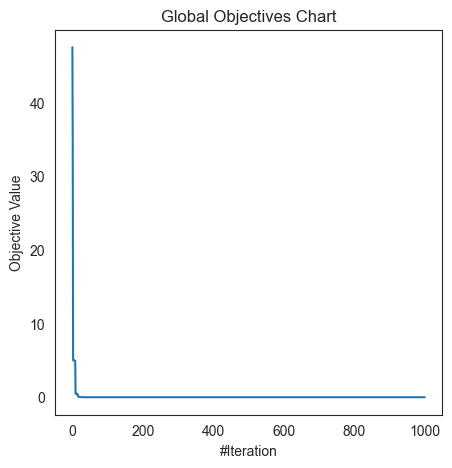

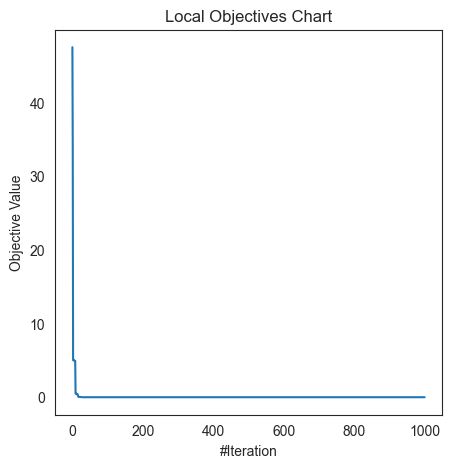

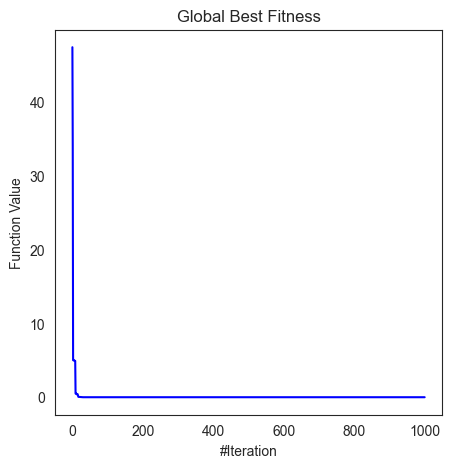

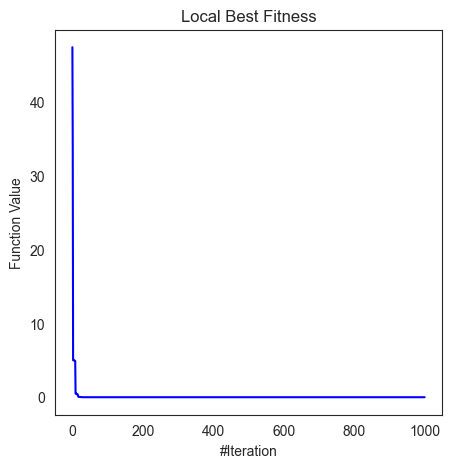

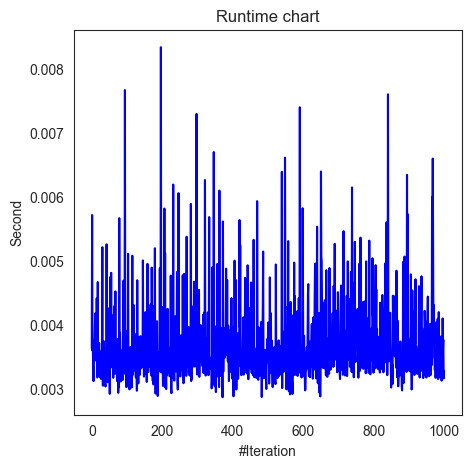

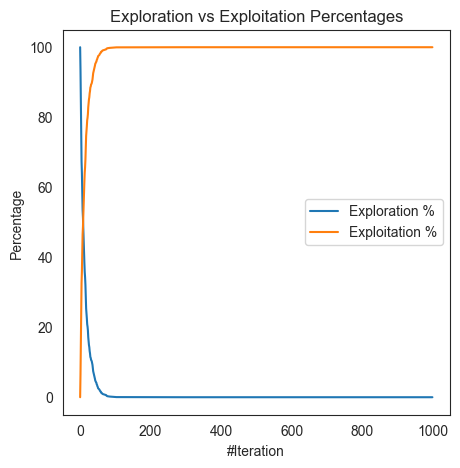

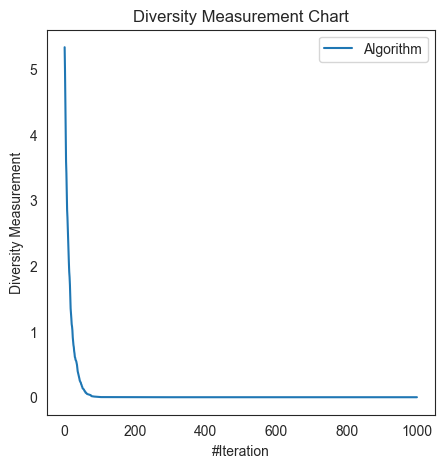

In [84]:
model_selected,br = RandomForestClassifier(),80
SCA =BaseSCA(epoch, pop_size)
SCA.solve(problem_dict1)
#model_selected = RandomForestClassifier()
## You can access all available fitures via object "history" like this:
SCA.history.save_global_objectives_chart(filename="hello/goc")
SCA.history.save_local_objectives_chart(filename="hello/loc")
SCA.history.save_global_best_fitness_chart(filename="hello/gbfc")
SCA.history.save_local_best_fitness_chart(filename="hello/lbfc")
SCA.history.save_runtime_chart(filename="hello/rtc")
SCA.history.save_exploration_exploitation_chart(filename="hello/eec")
SCA.history.save_diversity_chart(filename="hello/dc")

In [85]:
best_features

array([3.68899262e-01, 8.82222826e-01, 9.63815816e-01, 3.41405732e-01,
       3.46062720e-01, 1.31377996e-01, 9.23530130e-01, 6.30734444e-01,
       4.25184428e-02, 6.51967919e-01, 9.58019079e-01, 2.63929397e-01,
       4.54137642e-01, 9.22146664e-01, 8.65923499e-01, 6.74422086e-01,
       8.47214408e-01, 4.57732337e-01, 3.97128909e-01, 4.75115853e-02,
       7.79183680e-01, 9.75115753e-01, 8.73748780e-01, 1.93207236e-01,
       7.12863740e-01, 3.99972639e-01, 8.16908268e-01, 6.24439845e-01,
       6.06951763e-02, 5.12804917e-01, 1.92146774e-01, 6.38340812e-04,
       4.02435964e-01, 8.66298464e-01, 4.30108850e-01, 2.24078077e-02,
       2.28062567e-01, 5.45913384e-01, 1.65285924e-01, 6.82134736e-01,
       1.86873342e-01, 4.56095489e-01, 2.85985066e-01, 4.05839536e-02,
       8.31316587e-01, 2.01544142e-01, 8.03467938e-01, 7.80586728e-01,
       8.58501371e-01, 4.83909945e-01, 1.72822736e-01, 9.59579905e-01,
       4.75253338e-01, 5.52336710e-01, 7.51038403e-01, 2.27217719e-01,
      

In [86]:
selected_features = best_features > 0.5
selected_feature=selected_features
print('Number of selected features:', selected_feature.sum())

Number of selected features: 46


In [87]:
X_test=np.array(X_test)
y_test=np.array(y_test)

In [88]:
X_test.shape,y_test.shape

((381935, 92), (381935,))

In [89]:
X_test[:, ].shape

(381935, 92)

In [90]:
type(X_test),type(X_train),X_train.shape

(numpy.ndarray, numpy.ndarray, (1527736, 92))

In [91]:
X_train.shape,y_train.shape

((1527736, 92), (1527736,))

In [92]:
model_selected.fit(X_train[:10000, selected_feature], y_train[:10000])

RandomForestClassifier()

In [93]:
y_pred = model_selected.predict(X_test[ :10000,selected_features])

In [94]:
y_pred

array([ 2, 11,  7, ...,  8,  7,  7])

In [95]:
y_test2

array([[0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [96]:
from sklearn import utils
print(type(y_pred),type(y_test2),len(y_pred),len(y_test2))
#y_pred=y_test
print(utils.multiclass.type_of_target(y_pred))
print(utils.multiclass.type_of_target(y_test2))

<class 'numpy.ndarray'> <class 'numpy.ndarray'> 10000 381935
multiclass
multilabel-indicator


In [97]:
accuracy =accuracy_score(y_test[:10000], y_pred[:10000])
recall= recall_score(y_test[:10000], y_pred[:10000], average='weighted')
precision = precision_score(y_test[:10000], y_pred[:10000], average='weighted')
f1s = f1_score(y_test[:10000], y_pred[:10000], average='weighted')

print("Accuracy: "+ "{:.2%}".format(accuracy))
print("Recall: "+ "{:.2%}".format(recall))
print("Precision: "+ "{:.2%}".format(precision))
print("F1-Score: "+ "{:.2%}".format(f1s))  
#96

Accuracy: 95.31%
Recall: 95.31%
Precision: 95.64%
F1-Score: 95.22%
